# EDA case study

## Problem Statement


The consumer finance company aims to mitigate the risks associated with lending by leveraging Exploratory Data Analysis (EDA) to identify patterns indicative of loan default, enabling informed decision-making to minimize both the loss of potential business from rejecting creditworthy applicants and the financial loss resulting from approving risky applicants.

### understanding the problem

The business problem revolves around the challenges faced by a consumer finance company in making informed decisions about loan applications. The two primary concerns involve the risk of losing potential business if a good applicant is rejected and the financial losses incurred if a risky applicant is approved and subsequently defaults on the loan. The objective is to use data analysis to identify patterns that indicate the likelihood of loan default, allowing the company to optimize its decision-making process and minimize credit loss.

##### aim is to identify the likelihood of loan default and explore the scenarios of fully paid, current and charged-off , risk analytics and variable significance

###### Understand the data, download and load the data

### Import neccesary libraries

In [181]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the Loan Data Set

In [182]:
#reading the data
loan_data = pd.read_csv(r"C:\Users\ifnaa_iyjrs70\Downloads\loan\loan.csv")

### DATA UNDERSTANDING

In [183]:
# Explore dataset structure
print(loan_data.info())

# Explore basic statistics of numerical variables
print(loan_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std     

In [184]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [185]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
loan_data.shape

(39717, 111)

In [187]:
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [188]:
# Check for missing values
missing_values = loan_data.isnull().sum()

print(missing_values)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [189]:
#row wise missing values
loan_data.isnull().sum(axis = 1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

###### visualizing missing values

In [190]:
#!pip install missingno
import missingno as msno

<Axes: >

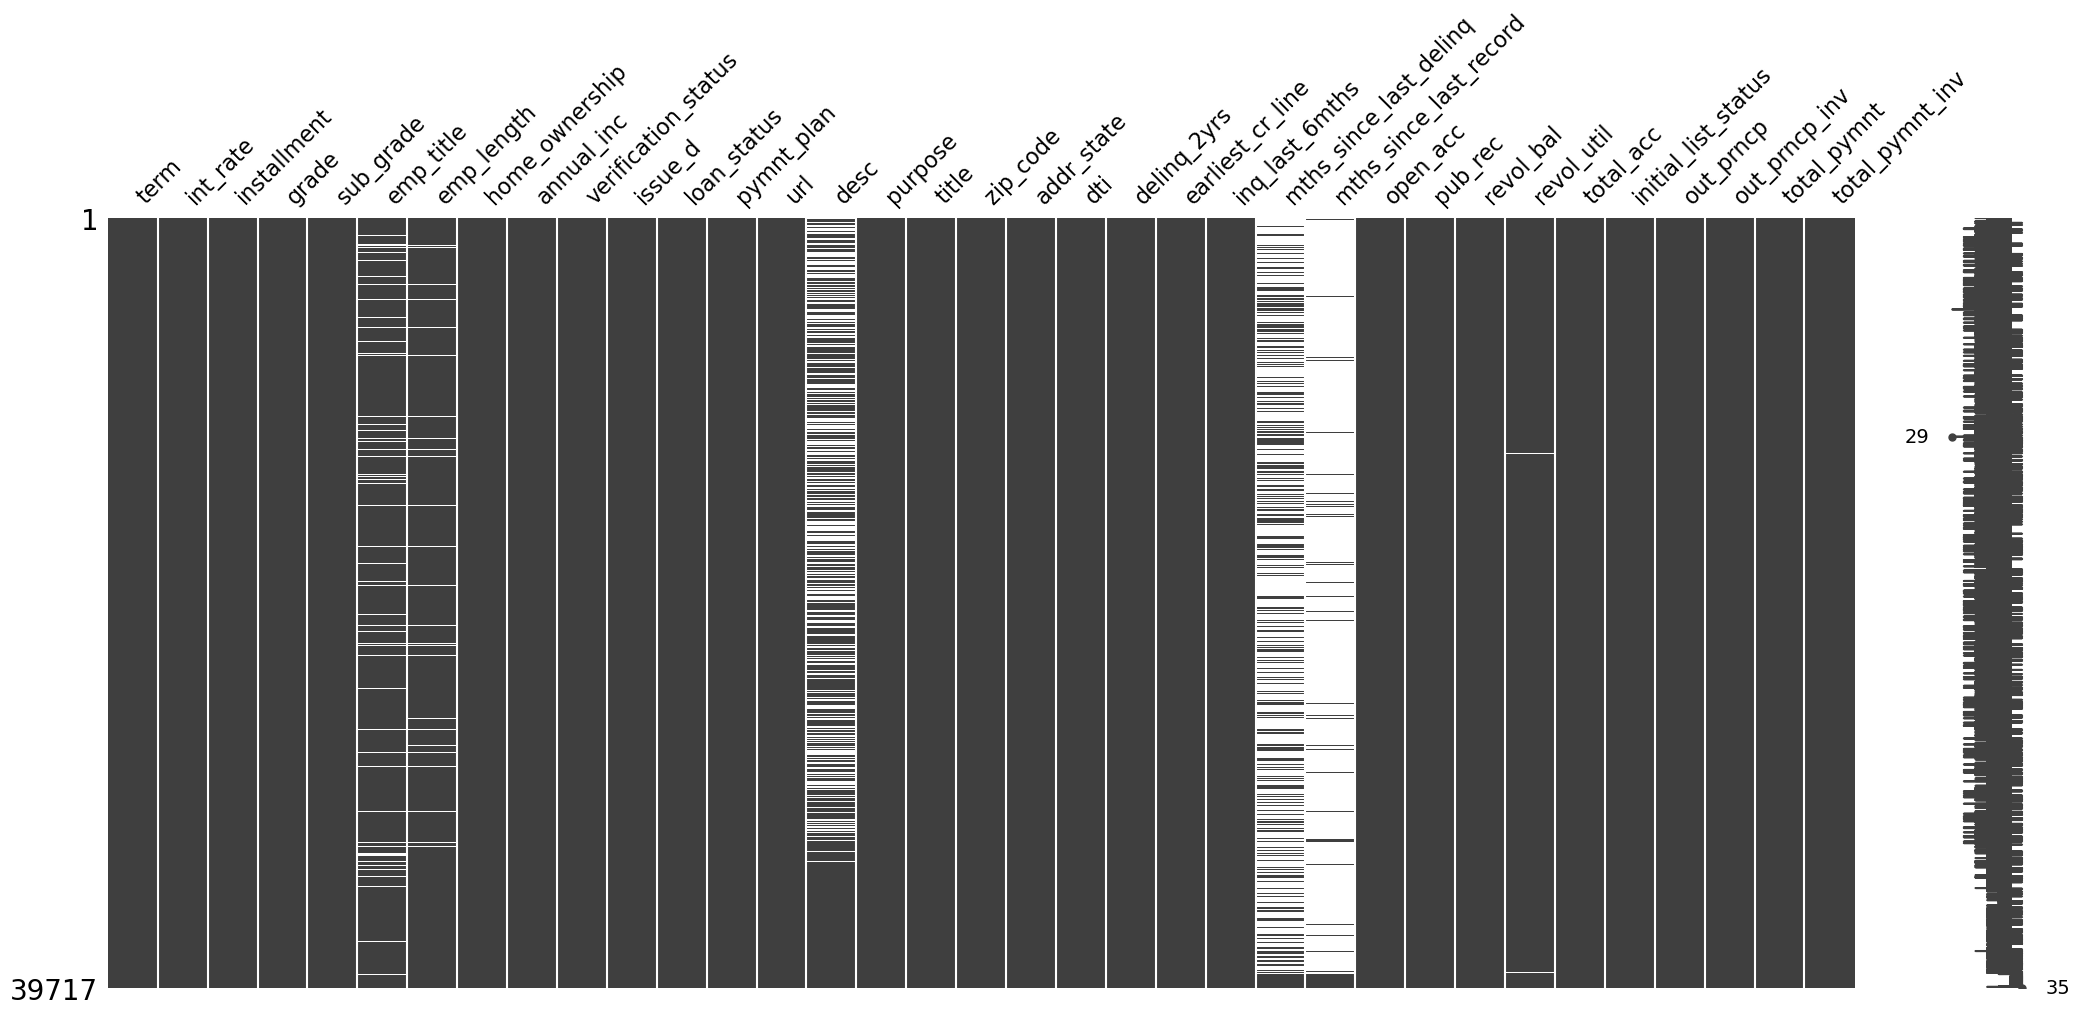

In [191]:
msno.matrix(loan_data.iloc[:, 5:40])


<Axes: >

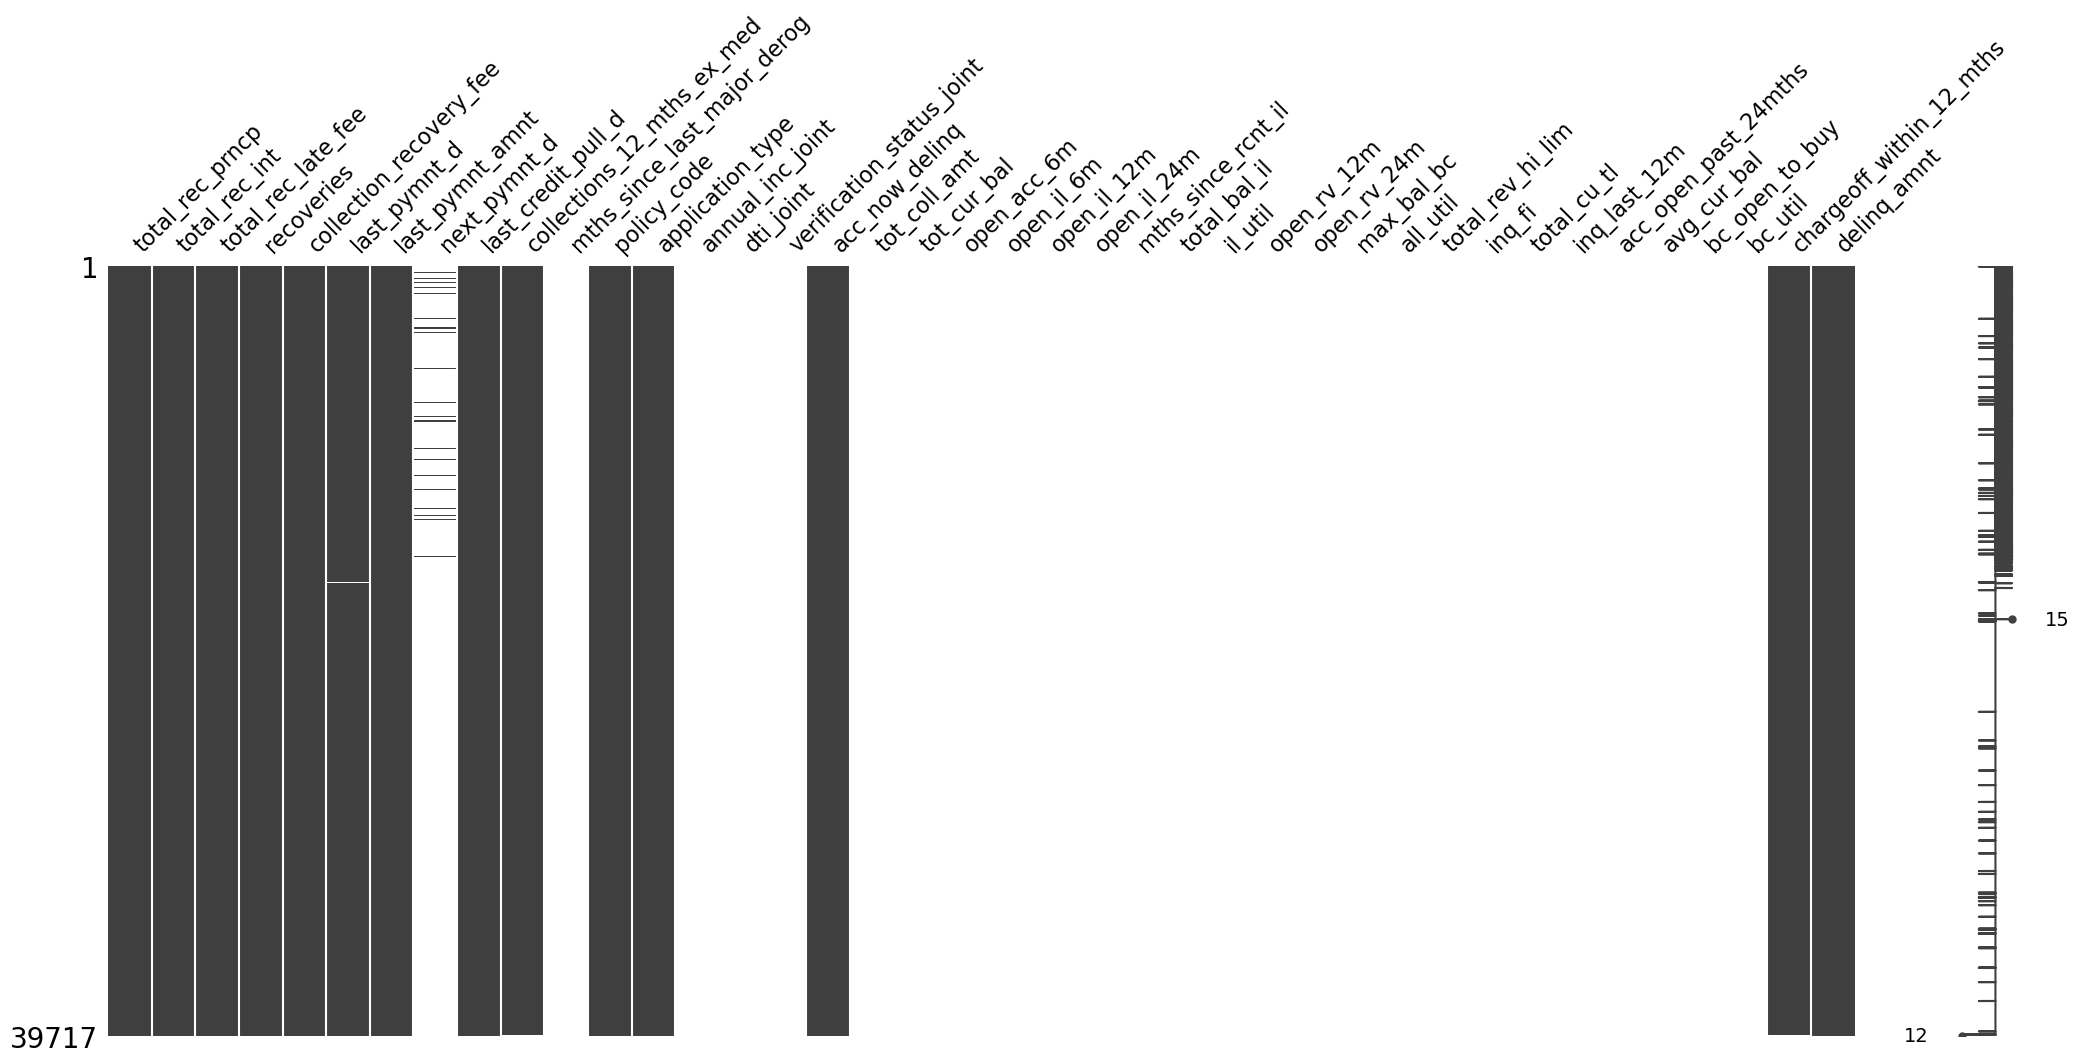

In [192]:
msno.matrix(loan_data.iloc[:, 40:80])


<Axes: >

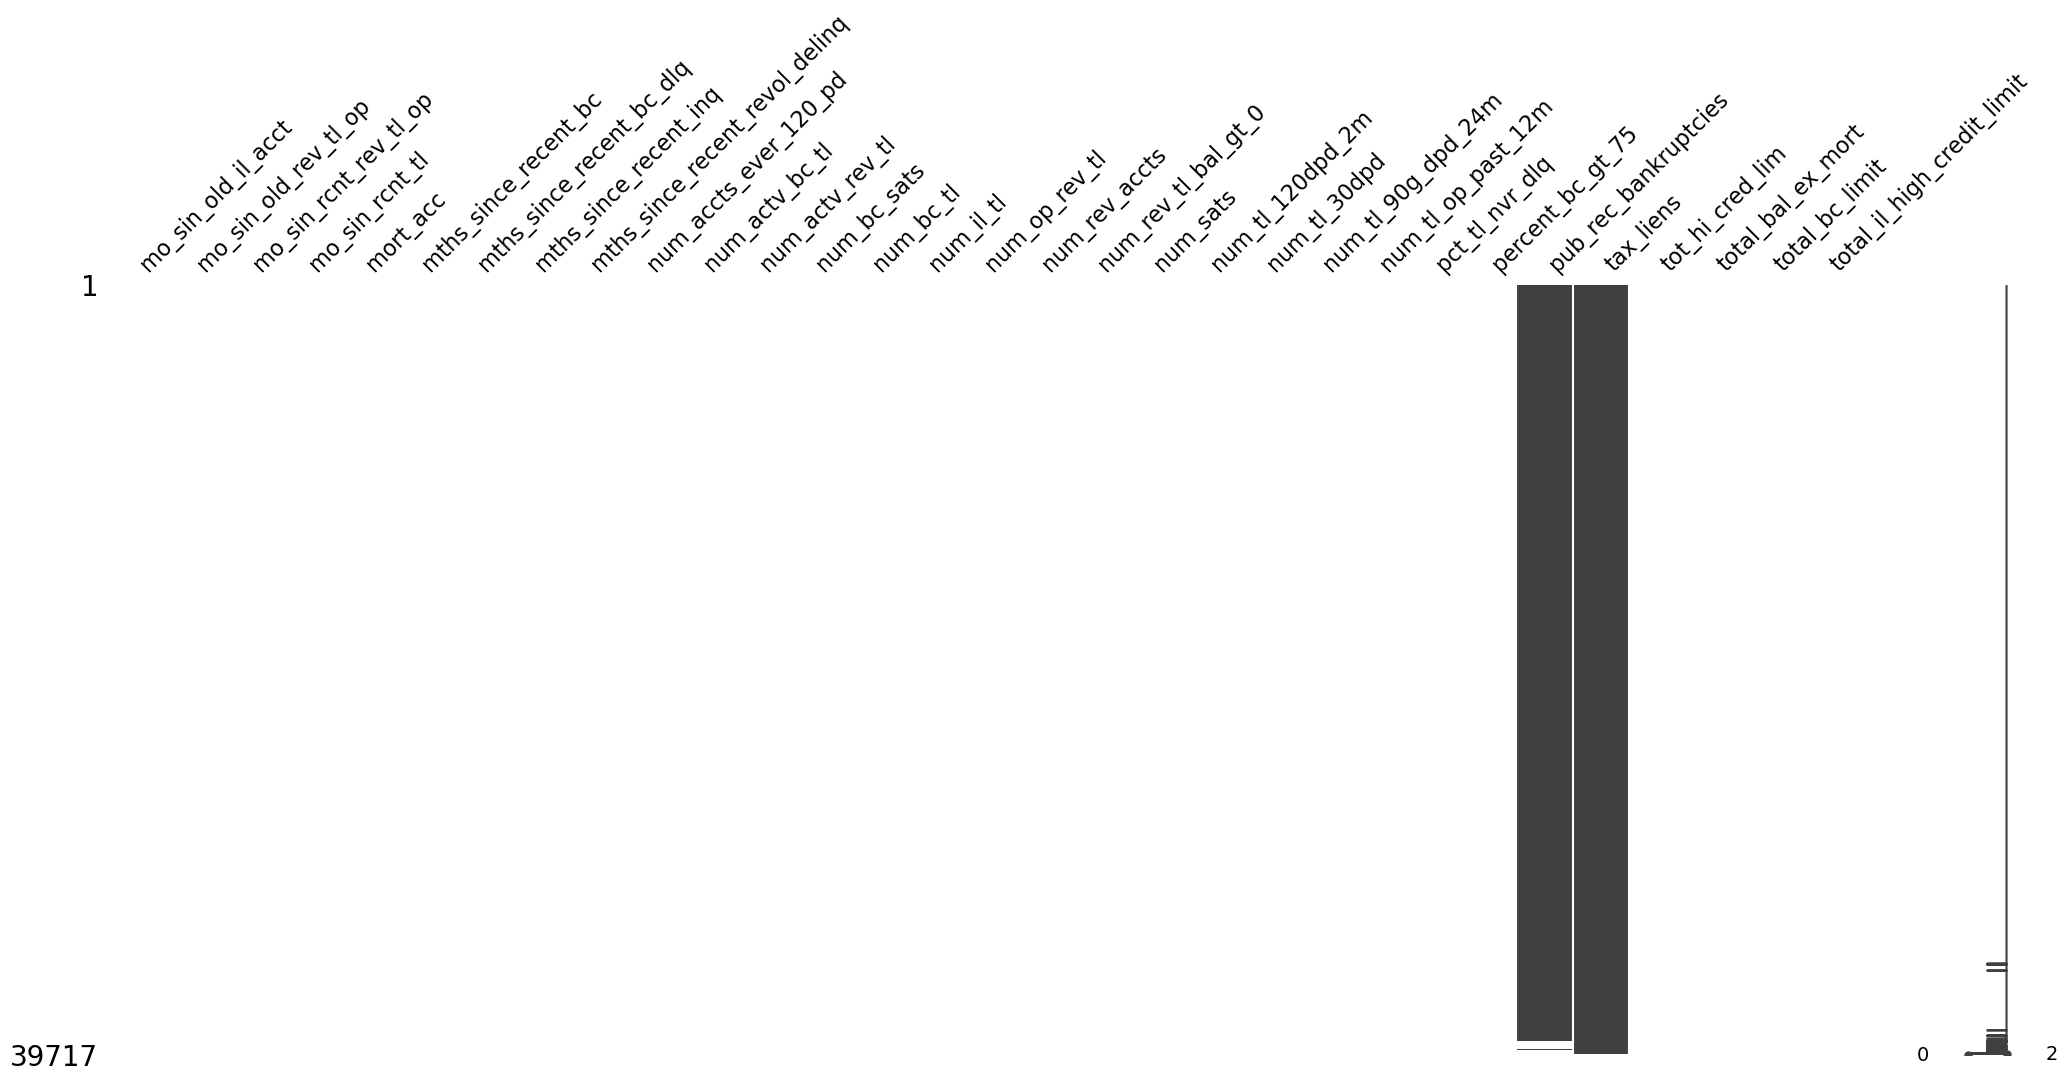

In [193]:
msno.matrix(loan_data.iloc[:, 80:112])


<Axes: >

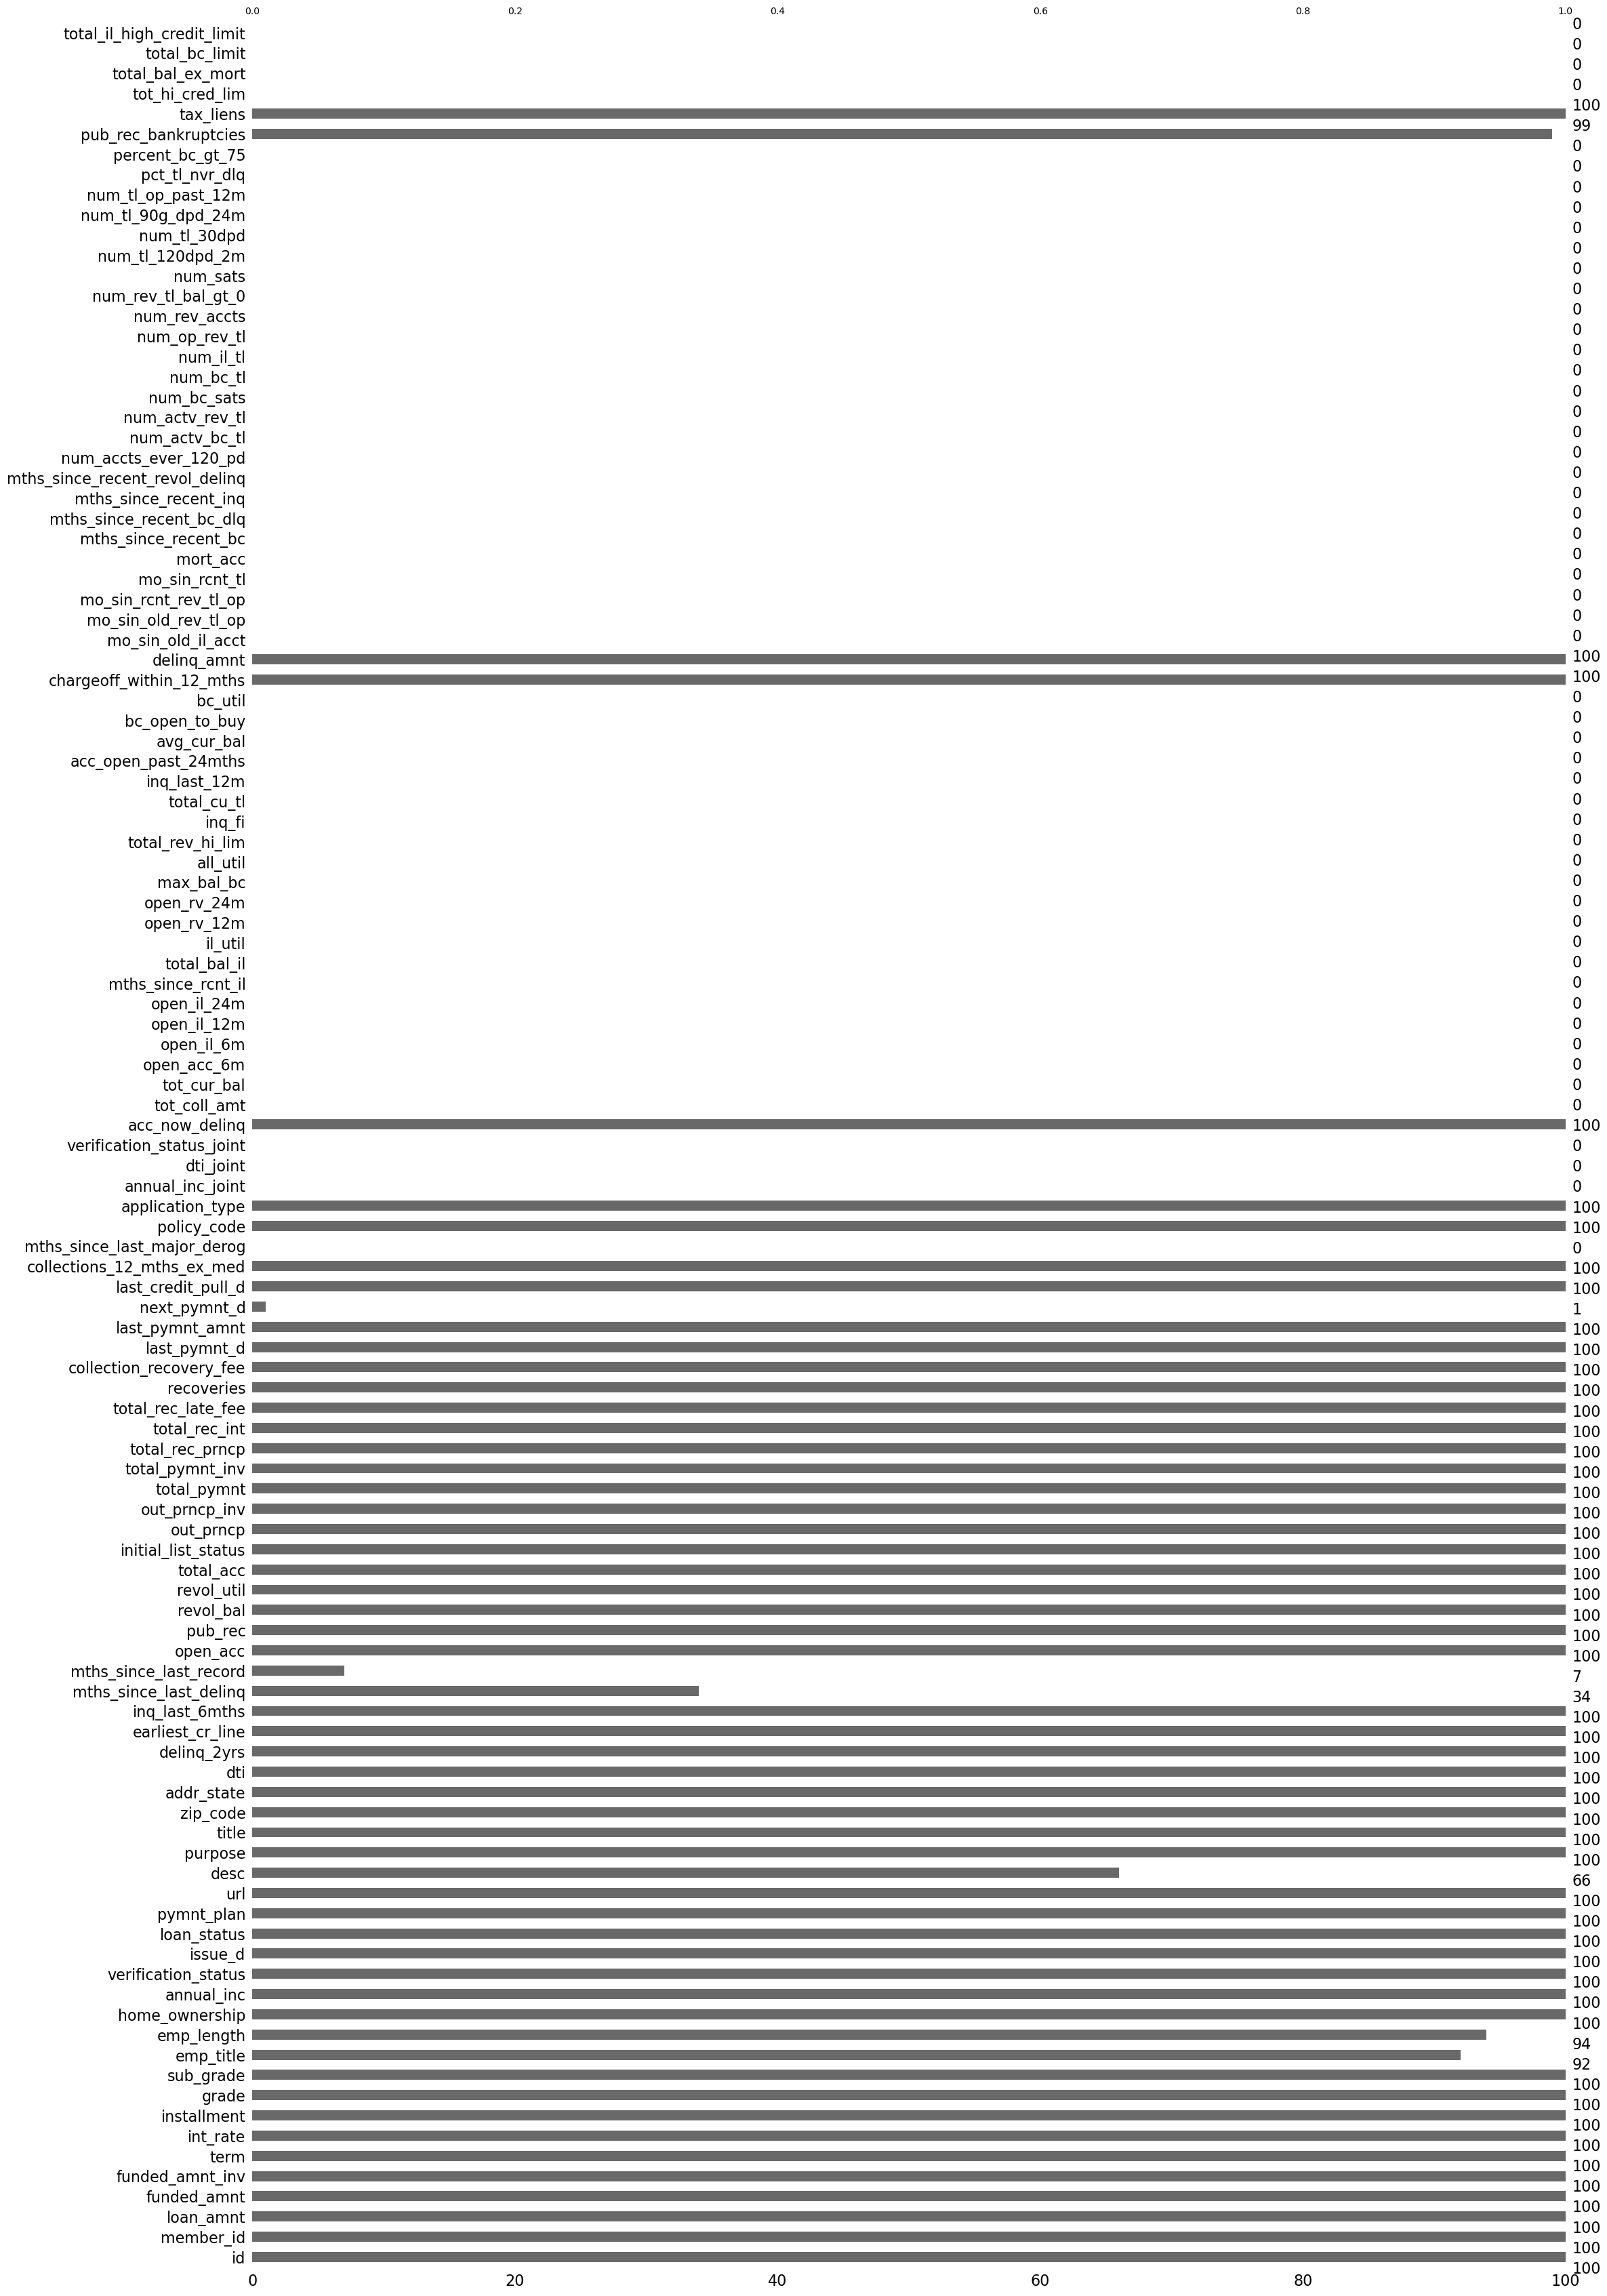

In [194]:
msno.bar(loan_data.sample(100))

In [195]:
#!pip install klib
import klib

GridSpec(6, 8)

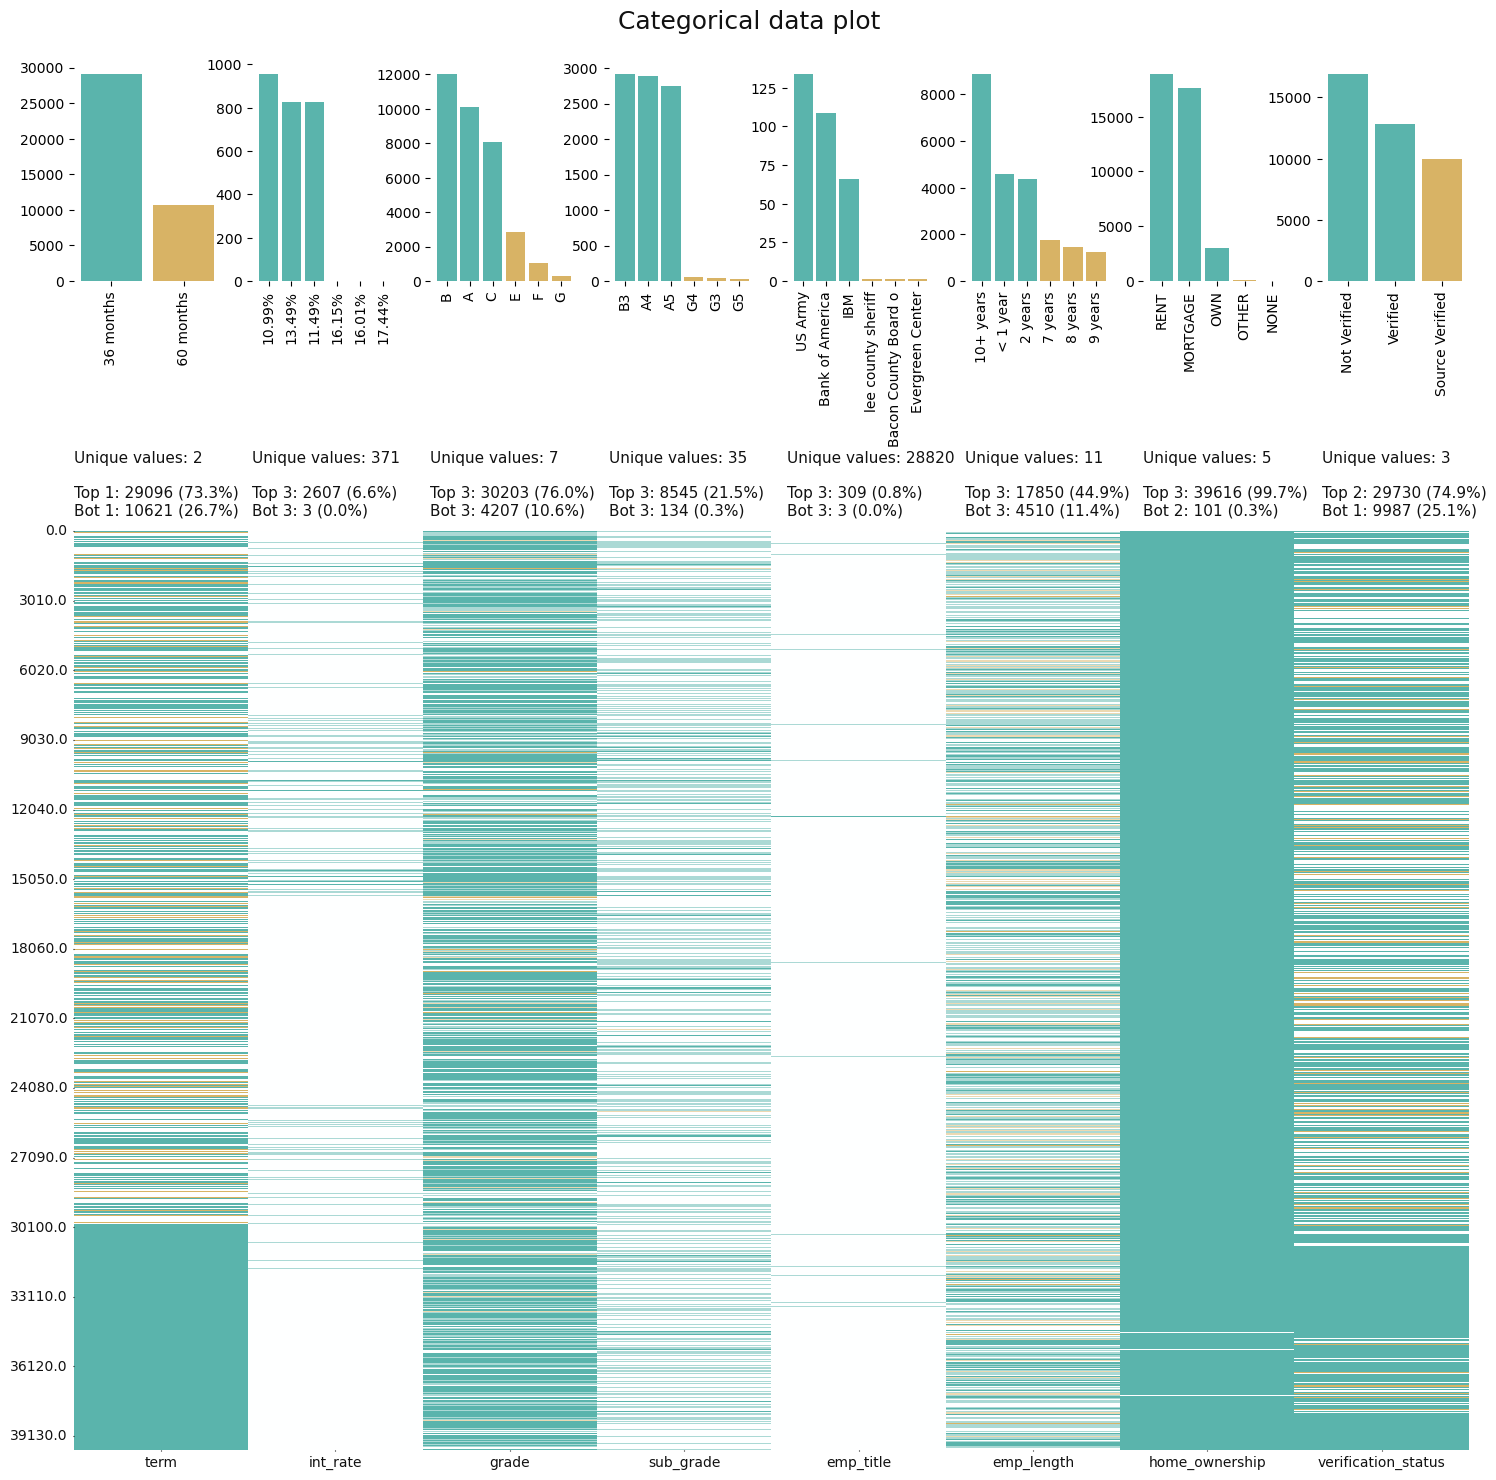

In [196]:
klib.cat_plot(loan_data.iloc[:, 5:15])

<Axes: title={'center': 'Feature-correlation (pearson)'}>

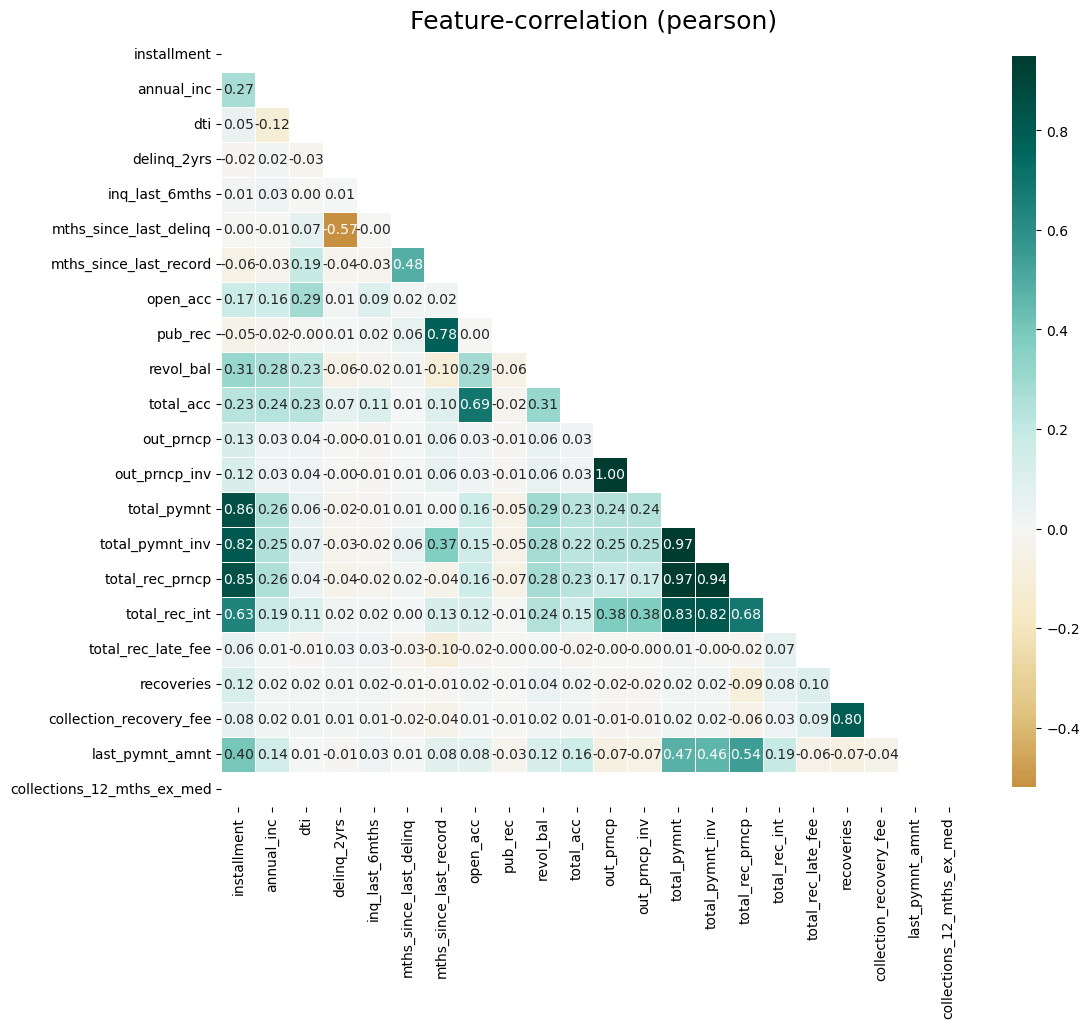

In [197]:
klib.corr_plot(loan_data.iloc[:, 5:50])

In [198]:
klib.corr_interactive_plot(loan_data.iloc[:, 5:50])

In [199]:
!pip install ydata-profiling

In [200]:
from pandas_profiling import ProfileReport

In [201]:
profile = ProfileReport(loan_data,title = 'lending club EDA')

In [202]:
profile.to_file("lending_club_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [203]:
!pip install jupyter-summarytools

In [204]:
from summarytools import dfSummary

In [205]:
dfSummary(loan_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 683131.9 (210694.1)min < med < max:54734.0 < 665665.0 < 1077501.0IQR (CV) : 321534.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtUlEQVR4nO3du27iQBSA4TNLAHORLYQEHS+wEgWlH2Ifdh8hBU9AS0VngZAR3ngB462jJSG+refM/l8dhyl+mcEnGUye5wLY7lvbCwC+4qXtBdjKGDMQkV7Jyy95nr/VuZ7/HaE+YIwZTKfTH77vT8pcfzqdjsaYn8RaH0J9rOf7/iQMw7cgCNIiF8Zx7K3X68nhcOiJCKHWhFA/EQRBOpvNfhW9LssyX0R8Y0yZl2Xb8ACh1ixJku71el0uFotOp9MpdDcWYdvwEUKt2eVyefE8b7hardL5fH4sci3bho8RakNGo1GpbYOIDGpfjAN4jgoVCBUq8NbvGFcHFYTqEJcHFYTqFmcHFYTqoLKDCrH4iQOhWibLsq6Un2r59/u9W/OSvqzJ/TGhWqTqVOt6vXpZln1P0/RVRMrcUUtren9MqBapMtUSEdntdpPNZjO83W6dJtb3RKP7Y0K1UNmp1vF4bH2P2dT+mAf+UIFQoQKhQgVChQqEChUIFSo4+3iq4pSk1QkP/uZkqFWnJG1OePCYk6FKhSmJSOsTHjzgaqgiUn5KYsOEB+/xYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFDB6X/uQzE2n3ZNqBAR+0+7JlSIiP2nXRMq3rH1tGs+TEEFQoUKhAoVCBUqECpUIFSoQKhQwernqBWON+doc8dYG2qV48052tw91oYqFY4352hz99gcqoiUO96co83dw4cpqNDoHZXvekJdGguV73pCnZ6GWuUR0Xg8noVheOK7nlDVp6HW8Yio3++/2vj3jdDl2R215/v+ZLlcymAw+F3kF+/3e2+73Q7jOB5FUXQpurDz+eyJiCRJ4kVRNPxX17b52lrXXfX6OI69Zz/zB6YSkxByCH5PAAAAAElFTkSuQmCC"">",0(0.0%)
2,member_id[int64],Mean (sd) : 850463.6 (265678.3)min < med < max:70699.0 < 850812.0 < 1314167.0IQR (CV) : 380559.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfElEQVR4nO3cwYraQBjA8W+aVaJCggh68wUKPXj0IfqwfYQefALfwJsgEjHdYIzpobRsYat1kmHmm/3/zjuYw5+YiTufadtWgNB98n0BwP948X0BMTLGjERkaLn80rbta5/XEwNC7ZkxZjSbzb5mWTa1WX86nY7GmG/E+jdC7d8wy7Lper1+zfO8emZhURTpZrOZHg6HoYhYhRrr3ZxQHcnzvJrP5z8slo5sPzPmuzmhxsXr3dwlQo2Qj7u5a4QamKZpBiKSGWNslme3223Q8yUFgVADUpbloK7rL8vlMkmS5KmvbhGRuq7Tpmk+V1X1XURs7qiduNzIEWpALpfLS5qm49VqVS0Wi+Oz63e73XS73Y6v12vi4vrucb2RI9QATSYTq2fM4/Ho8xnT6UaOUNErVxs5fuuHCoQKFfjq/4cOO9hoXxH5RKjv6LKD9f2KKFaE+j7rHazPV0QxI9Q7bHawnl8RRYvNFFQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVOoeKPkGezEipEJPzZrIQKEQl/Nmu0oXacfvxh50eFOps1ylC7Tj9mflR4ogxVOsyOEmF+VIhiDVVE7KcfMz8qPEGHyoxS/BZsqMwoxVvBhirMKMUbIYcqIswoxS/81g8VCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVHD6Wz/HQdAXZ6FyHAR9cnlH5TgIeuP83/w4DoI+PAyV4yAIwd1QOQ6CUDy6o3IcBEFw/oxalmW63+/Hz647n8+p7foua31+ttbr7rq+KIr00d/8BJowlD1QmcCBAAAAAElFTkSuQmCC"">",0(0.0%)
3,loan_amnt[int64],Mean (sd) : 11219.4 (7456.7)min < med < max:500.0 < 10000.0 < 35000.0IQR (CV) : 9500.0 (1.5),885 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3cTY7aMBiA4c9lgPCjRAgJdlygUhcsc4getkeYBSfgBuyQEAoinYjw003b1WgG7Lh8X/o++4RI84rBjm13u90E0O7Lsx8AuMdLzJs75wYi0gu4xel2u7019TywK1qozrnBdDr9nqbpxPceh8Nh75z7QayI+Y3aS9N0kuf5W5Zl1aMXF0WRrFaryW6364kIof7nov7rFxHJsqyazWY/PS8fNPowMIvBFEwgVJhAqDCBUGECocIEQoUJhAoTCBUmRJ/wD3G5XLoikjrnfC5nnUCLqA21LMtuXdffFotFp9PpPPwKlnUC7aI21NPp9JIkyXC5XFbz+Xz/yLWsE2gftaH+MRqNfNcKsE6gRRhMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhgvqF074C91uJsOdKlU9DDTiMN71er12P64KF7rcSYc+VNh+GGnIYb13XyeVy+VpV1auI+B476SVkv5UIe640+uwb1fsw3s1mM1mv18Pz+dwJeL4gAfutRNhzpcpdv1F9DuPd7/f8odEYRv0wgVBhQmunp0JxnJAuhPoOjhPSh1DfwXFC+hDqBzhOSA8GUzCBUGECocIEfqNGwNRW8wi1YUxtxUGoDWNqKw5CjYSprWYxmIIJhAoTCBUmECpMIFSYwKi/ZQJ2DYsoftlAqC0SsmtYRPfLBkJtF+9dw9pfNhBqC/nsGv5N7csGQlUmcEHL006niY1QFQld0PLM02liI1RFQo8i0nA6TSyEqpDvgpZnn04Tc2qMUNGI2FNjhIq/Qgdy4/F4luf5IcbUGKFCRJobyPX7/dcYU2OEChHRP5C7K9SiKJJHb3w8HhMRkbIsk+12O/yX11v9bA3PHcrns+/p6xdDfLD4QerBXQAAAABJRU5ErkJggg=="">",0(0.0%)
4,funded_amnt[int64],Mean (sd) : 10947.7 (7187.2)min < med < max:500.0 < 9600.0 < 35000.0IQR (CV) : 9

### DATA CLEANING

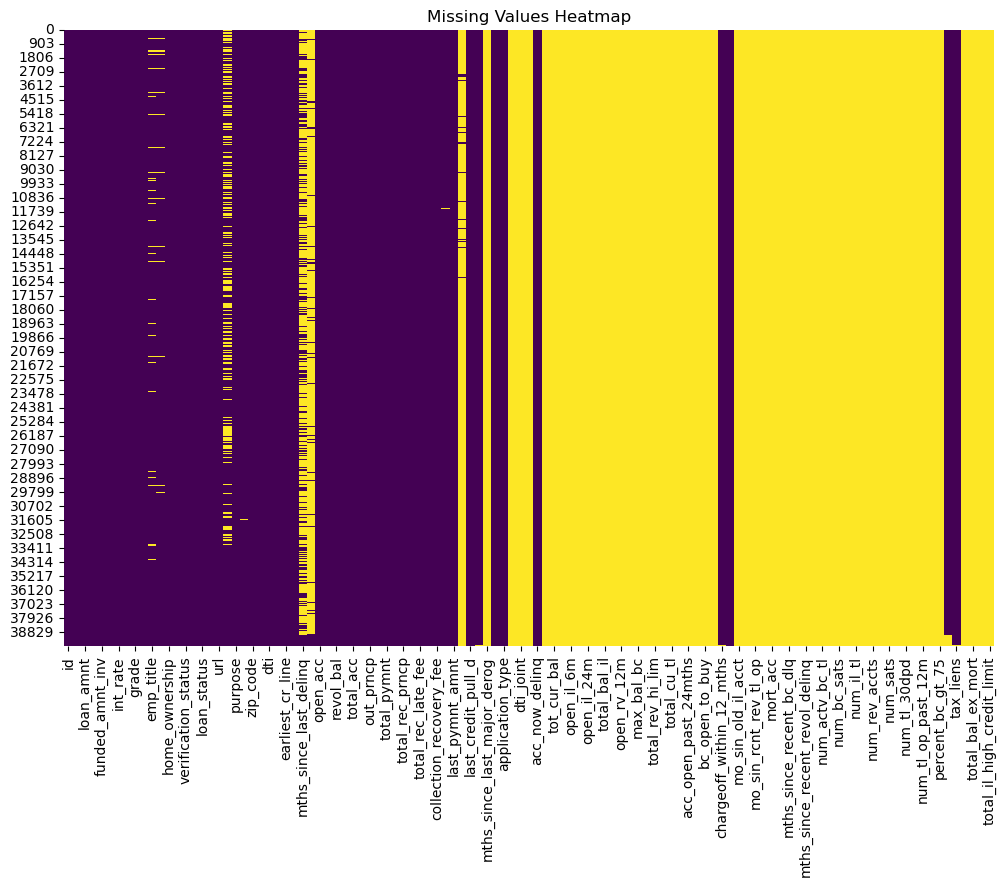

In [206]:
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(loan_data.isnull(), cbar=False, cmap='viridis')

# Add title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()

In [207]:
# Drop columns with all null values
loan_data.dropna(axis=1, how='all', inplace=True)


In [208]:
loan_data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [209]:
dfSummary(loan_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 683131.9 (210694.1)min < med < max:54734.0 < 665665.0 < 1077501.0IQR (CV) : 321534.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtUlEQVR4nO3du27iQBSA4TNLAHORLYQEHS+wEgWlH2Ifdh8hBU9AS0VngZAR3ngB462jJSG+refM/l8dhyl+mcEnGUye5wLY7lvbCwC+4qXtBdjKGDMQkV7Jyy95nr/VuZ7/HaE+YIwZTKfTH77vT8pcfzqdjsaYn8RaH0J9rOf7/iQMw7cgCNIiF8Zx7K3X68nhcOiJCKHWhFA/EQRBOpvNfhW9LssyX0R8Y0yZl2Xb8ACh1ixJku71el0uFotOp9MpdDcWYdvwEUKt2eVyefE8b7hardL5fH4sci3bho8RakNGo1GpbYOIDGpfjAN4jgoVCBUq8NbvGFcHFYTqEJcHFYTqFmcHFYTqoLKDCrH4iQOhWibLsq6Un2r59/u9W/OSvqzJ/TGhWqTqVOt6vXpZln1P0/RVRMrcUUtren9MqBapMtUSEdntdpPNZjO83W6dJtb3RKP7Y0K1UNmp1vF4bH2P2dT+mAf+UIFQoQKhQgVChQqEChUIFSo4+3iq4pSk1QkP/uZkqFWnJG1OePCYk6FKhSmJSOsTHjzgaqgiUn5KYsOEB+/xYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFDB6X/uQzE2n3ZNqBAR+0+7JlSIiP2nXRMq3rH1tGs+TEEFQoUKhAoVCBUqECpUIFSoQKhQwernqBWON+doc8dYG2qV48052tw91oYqFY4352hz99gcqoiUO96co83dw4cpqNDoHZXvekJdGguV73pCnZ6GWuUR0Xg8noVheOK7nlDVp6HW8Yio3++/2vj3jdDl2R215/v+ZLlcymAw+F3kF+/3e2+73Q7jOB5FUXQpurDz+eyJiCRJ4kVRNPxX17b52lrXXfX6OI69Zz/zB6YSkxByCH5PAAAAAElFTkSuQmCC"">",0(0.0%)
2,member_id[int64],Mean (sd) : 850463.6 (265678.3)min < med < max:70699.0 < 850812.0 < 1314167.0IQR (CV) : 380559.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfElEQVR4nO3cwYraQBjA8W+aVaJCggh68wUKPXj0IfqwfYQefALfwJsgEjHdYIzpobRsYat1kmHmm/3/zjuYw5+YiTufadtWgNB98n0BwP948X0BMTLGjERkaLn80rbta5/XEwNC7ZkxZjSbzb5mWTa1WX86nY7GmG/E+jdC7d8wy7Lper1+zfO8emZhURTpZrOZHg6HoYhYhRrr3ZxQHcnzvJrP5z8slo5sPzPmuzmhxsXr3dwlQo2Qj7u5a4QamKZpBiKSGWNslme3223Q8yUFgVADUpbloK7rL8vlMkmS5KmvbhGRuq7Tpmk+V1X1XURs7qiduNzIEWpALpfLS5qm49VqVS0Wi+Oz63e73XS73Y6v12vi4vrucb2RI9QATSYTq2fM4/Ho8xnT6UaOUNErVxs5fuuHCoQKFfjq/4cOO9hoXxH5RKjv6LKD9f2KKFaE+j7rHazPV0QxI9Q7bHawnl8RRYvNFFQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVOoeKPkGezEipEJPzZrIQKEQl/Nmu0oXacfvxh50eFOps1ylC7Tj9mflR4ogxVOsyOEmF+VIhiDVVE7KcfMz8qPEGHyoxS/BZsqMwoxVvBhirMKMUbIYcqIswoxS/81g8VCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVHD6Wz/HQdAXZ6FyHAR9cnlH5TgIeuP83/w4DoI+PAyV4yAIwd1QOQ6CUDy6o3IcBEFw/oxalmW63+/Hz647n8+p7foua31+ttbr7rq+KIr00d/8BJowlD1QmcCBAAAAAElFTkSuQmCC"">",0(0.0%)
3,loan_amnt[int64],Mean (sd) : 11219.4 (7456.7)min < med < max:500.0 < 10000.0 < 35000.0IQR (CV) : 9500.0 (1.5),885 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3cTY7aMBiA4c9lgPCjRAgJdlygUhcsc4getkeYBSfgBuyQEAoinYjw003b1WgG7Lh8X/o++4RI84rBjm13u90E0O7Lsx8AuMdLzJs75wYi0gu4xel2u7019TywK1qozrnBdDr9nqbpxPceh8Nh75z7QayI+Y3aS9N0kuf5W5Zl1aMXF0WRrFaryW6364kIof7nov7rFxHJsqyazWY/PS8fNPowMIvBFEwgVJhAqDCBUGECocIEQoUJhAoTCBUmRJ/wD3G5XLoikjrnfC5nnUCLqA21LMtuXdffFotFp9PpPPwKlnUC7aI21NPp9JIkyXC5XFbz+Xz/yLWsE2gftaH+MRqNfNcKsE6gRRhMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhgvqF074C91uJsOdKlU9DDTiMN71er12P64KF7rcSYc+VNh+GGnIYb13XyeVy+VpV1auI+B476SVkv5UIe640+uwb1fsw3s1mM1mv18Pz+dwJeL4gAfutRNhzpcpdv1F9DuPd7/f8odEYRv0wgVBhQmunp0JxnJAuhPoOjhPSh1DfwXFC+hDqBzhOSA8GUzCBUGECocIEfqNGwNRW8wi1YUxtxUGoDWNqKw5CjYSprWYxmIIJhAoTCBUmECpMIFSYwKi/ZQJ2DYsoftlAqC0SsmtYRPfLBkJtF+9dw9pfNhBqC/nsGv5N7csGQlUmcEHL006niY1QFQld0PLM02liI1RFQo8i0nA6TSyEqpDvgpZnn04Tc2qMUNGI2FNjhIq/Qgdy4/F4luf5IcbUGKFCRJobyPX7/dcYU2OEChHRP5C7K9SiKJJHb3w8HhMRkbIsk+12O/yX11v9bA3PHcrns+/p6xdDfLD4QerBXQAAAABJRU5ErkJggg=="">",0(0.0%)
4,funded_amnt[int64],Mean (sd) : 10947.7 (7187.2)min < med < max:500.0 < 9600.0 < 35000.0IQR (CV) : 9

In [210]:
#dropping single-valued columns as they do not contribute useful information for identifying patterns in loan defaulters.
loan_data.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis=1, inplace=True)
loan_data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [211]:
# List of columns to be removed
post_approval_columns = ["id", "member_id", "url", "title", "emp_title", "zip_code", 
                         "last_credit_pull_d", "addr_state", "desc", "out_prncp_inv", 
                         "total_pymnt_inv", "funded_amnt", "delinq_2yrs", "revol_bal", 
                         "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", 
                         "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
                         "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , 
                         "chargeoff_within_12_mths", "mths_since_last_delinq", 
                         "mths_since_last_record"]

# Remove the specified columns from the DataFrame
loan_data.drop(post_approval_columns, axis=1, inplace=True)

# Display the updated shape and columns of the DataFrame
loan_data.shape, loan_data.columns


((39717, 21),
 Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
        'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
        'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
        'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
        'revol_util', 'total_acc'],
       dtype='object'))

In [212]:
#to focus the analysis on loans that have a clear outcome, either being fully paid or charged off. To achieve this, the records with a loan status of "Current" are excluded from the dataset. The "Current" status indicates that these loans are still ongoing, and their final outcome is unknown. By removing these records, the resulting DataFrame is narrowed down to loans with definitive outcomes, specifically those labeled as "Fully Paid" or "Charged Off."

# Exclude records with loan status as "Current"
loan_data = loan_data[loan_data.loan_status.isin(["Fully Paid", "Charged Off"])]

# Display unique values in the updated loan_status column
loan_data.loan_status.unique()


array(['Fully Paid', 'Charged Off'], dtype=object)

In [213]:
# checking for missing values
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

#### Handle missing values

In [214]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null  obje

In [215]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [216]:
#The value counts analysis reveals that the mode value has a significantly higher frequency compared to the next most frequent value in the "emp_length" column. Consequently, it is reasonable to impute missing values in this column with the mode value. Since the percentage of missing values is relatively low, replacing them with the mode value is not expected to have a substantial impact on the analysis.

# Impute missing values in the emp_length column with the mode value
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace=True)

# Check if there are any remaining missing values in the emp_length column
loan_data.emp_length.isna().sum()


0

In [217]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

##### Standardizing the Data:

The following steps are performed to standardize certain columns in the loan dataset:

1. The "revol_util" column, although described as an object, contains continuous values. To standardize this column, the percentage symbol is removed and the column is converted to numeric.
2. The "int_rate" column is similarly standardized by removing the percentage symbol and converting it to numeric.
3. The "emp_length" column is standardized by converting the values. If the value contains "< 1 year," it is assumed as 0. If it contains "10+ years," it is assumed as 10.
4. Although the "term" column is arguable to be an integer, given that it only has two unique values, it is treated as a categorical variable.


In [218]:
# Standardize the 'revol_util' column
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x: x.split('%')[0]))

# Standardize the 'int_rate' column
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x: x.split('%')[0]))

# Standardize the 'emp_length' column
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

# Convert the 'term' column to categorical
loan_data['term'] = loan_data['term'].astype('category')

# Display the updated DataFrame
loan_data.head()


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


#### Outlier Detection

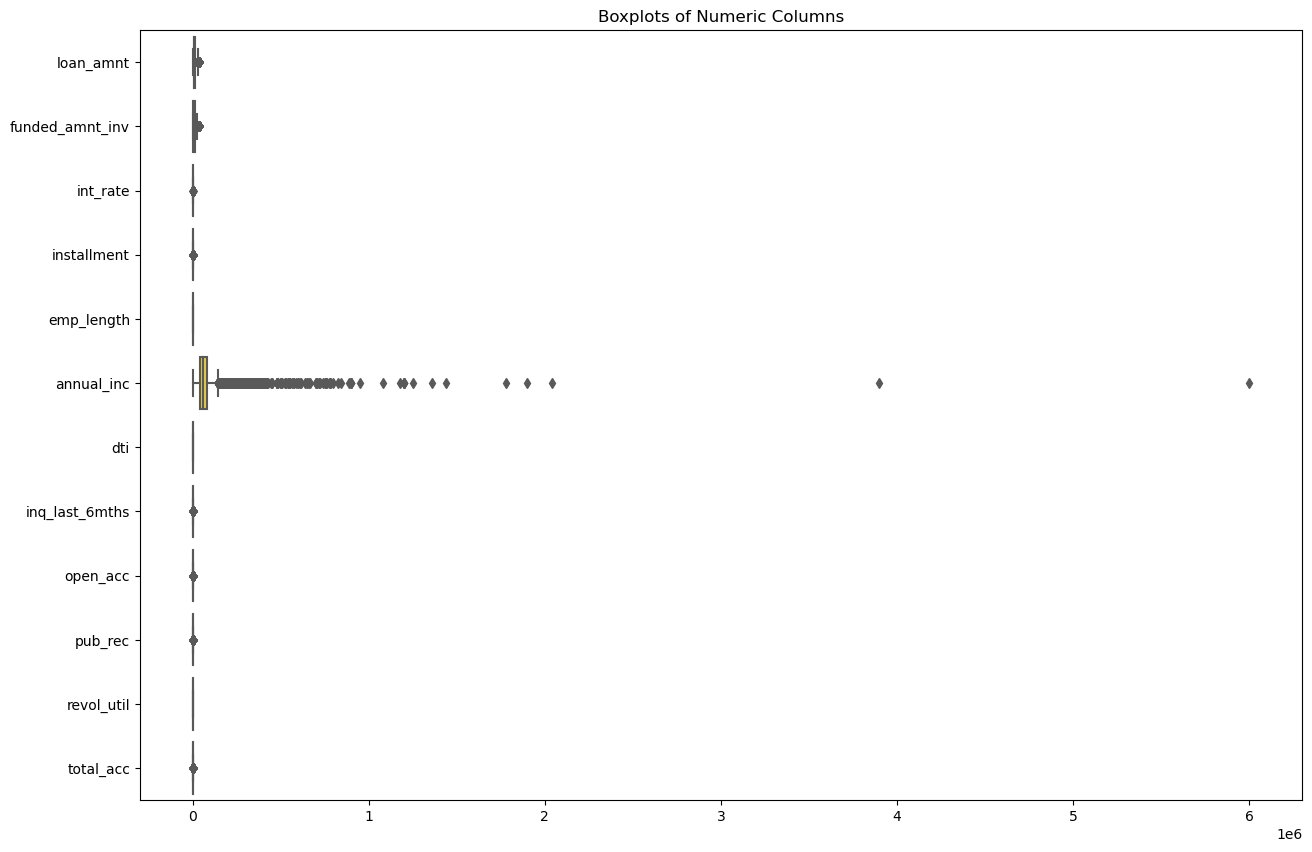

In [219]:
# Selecting numeric columns
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=loan_data[numeric_columns], orient="h", palette="Set2")
plt.title("Boxplots of Numeric Columns")
plt.show()

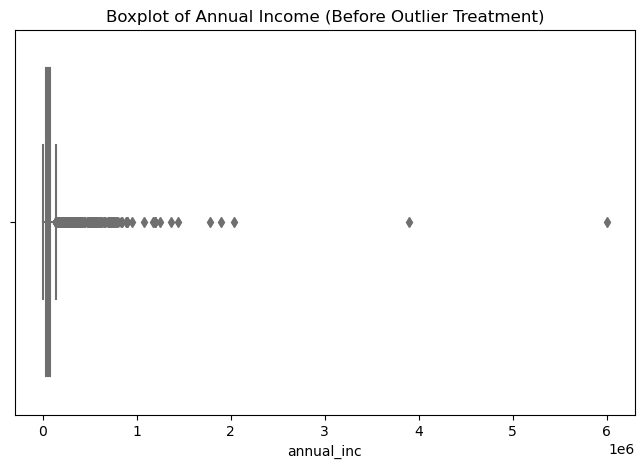

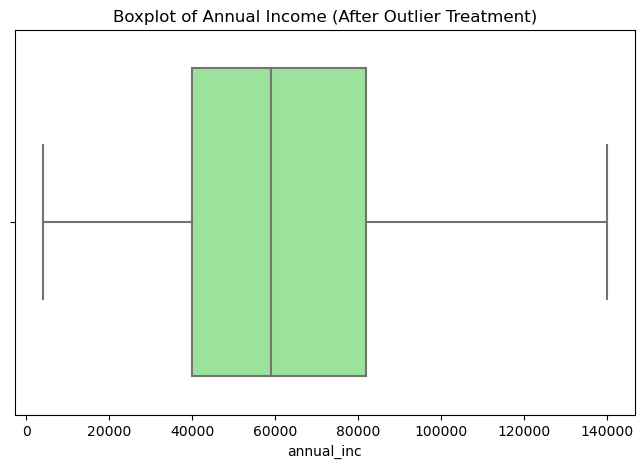

In [220]:
# Outlier Treatment for 'annual_inc'

# Display boxplot before outlier treatment
plt.figure(figsize=(8, 5))
sns.boxplot(x=loan_data['annual_inc'], color='skyblue')
plt.title("Boxplot of Annual Income (Before Outlier Treatment)")
plt.show()

# Define upper bound for annual income
upper_bound = loan_data['annual_inc'].quantile(0.95)

# Replace values above upper bound with the upper bound value
loan_data['annual_inc'] = np.where(loan_data['annual_inc'] > upper_bound, upper_bound, loan_data['annual_inc'])

# Display boxplot after outlier treatment
plt.figure(figsize=(8, 5))
sns.boxplot(x=loan_data['annual_inc'], color='lightgreen')
plt.title("Boxplot of Annual Income (After Outlier Treatment)")
plt.show()


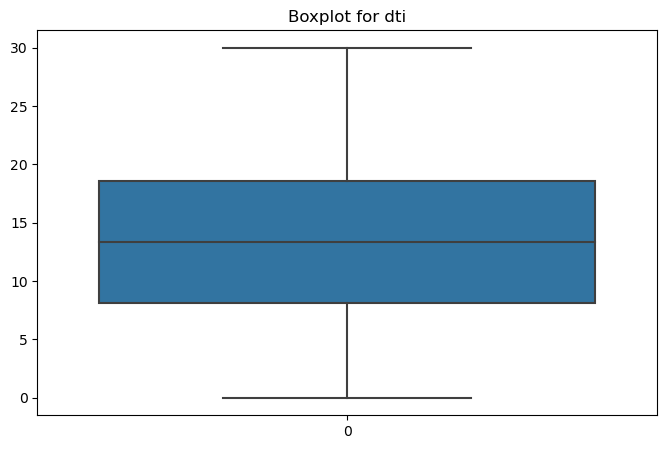

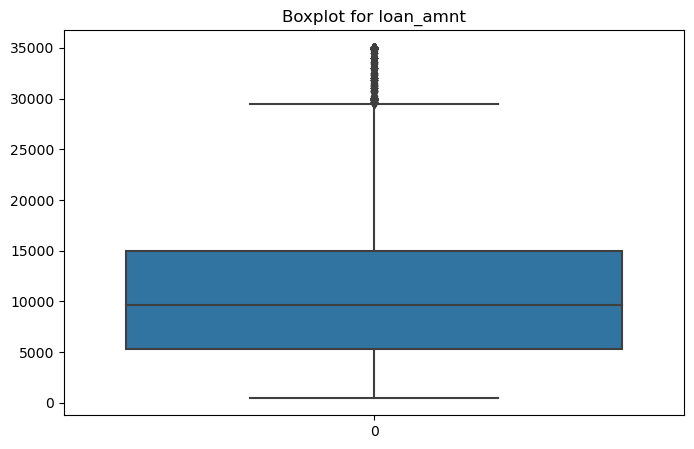

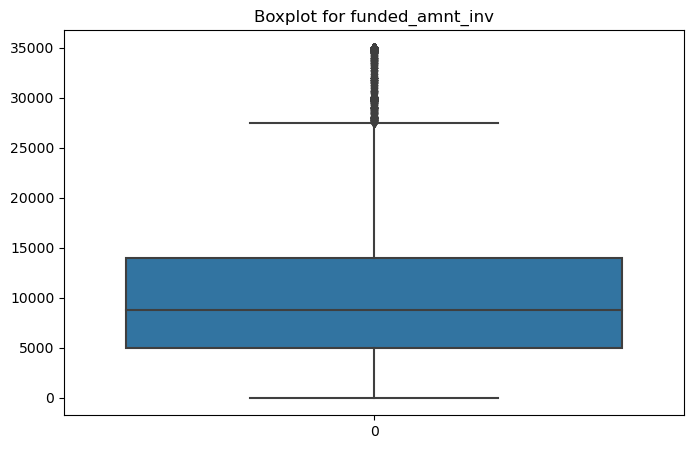

In [224]:
# List of numerical columns for outlier analysis
numerical_columns = ['dti', 'loan_amnt', 'funded_amnt_inv']

# Display boxplots for outlier detection
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(loan_data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()



In [225]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [226]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8750.000000
0.750    14000.000000
0.900    19975.000000
0.950    24506.582238
0.970    25828.061320
0.975    27975.000000
0.980    29890.414864
0.985    30000.000000
0.990    34721.583150
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

### DATA ANALYSIS

##### UNIVARIATE ANALYSIS , BIVARIATE AND MULTIVARIATE ANALYSIS

#### Visualizing Categorical Data

<Axes: xlabel='loan_status', ylabel='count'>

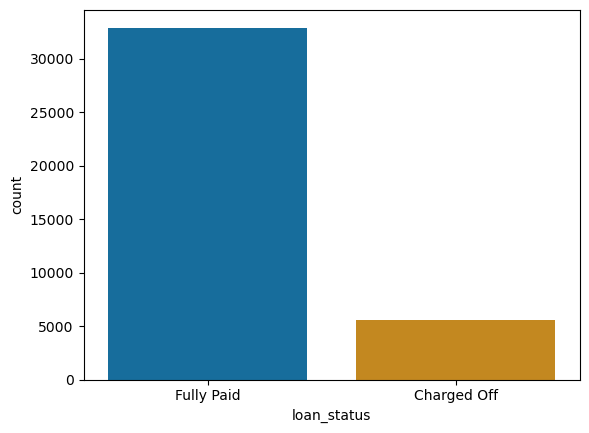

In [277]:
sns.countplot(x = 'loan_status', data = loan_data)

In [278]:
# Convert 'sub_grade' column to numeric by extracting the numerical part
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.astype(str).apply(lambda x: x[-1]))

# Display the first few rows of the 'sub_grade' column
loan_data.sub_grade.head()


0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

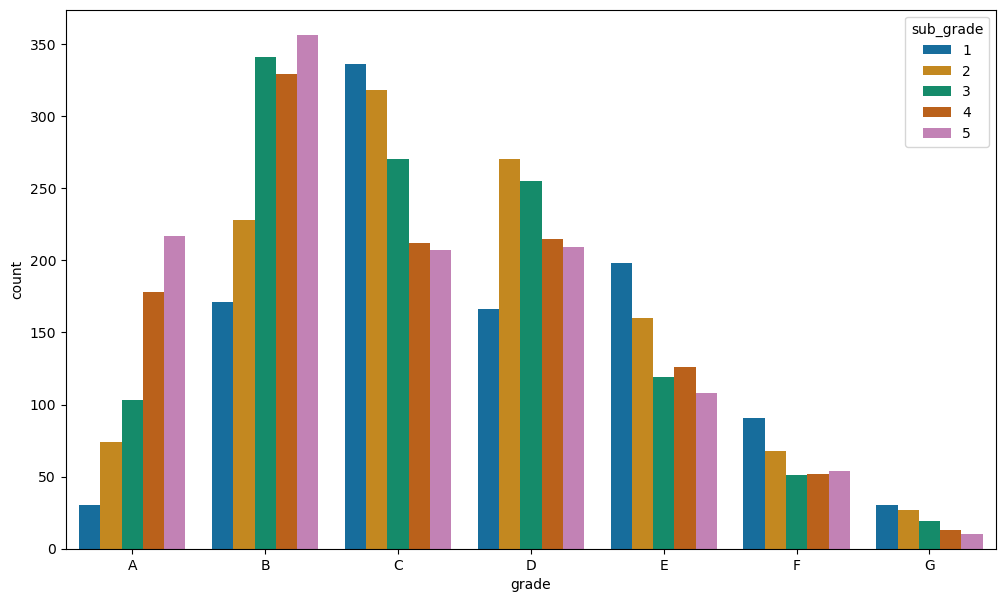

In [279]:
# Creating a countplot to visualize the distribution of subgrades within each grade for charged-off loans
fig, ax = plt.subplots(figsize=(12, 7))
sns.set_palette('colorblind')
sns.countplot(x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='sub_grade', data=loan_data[loan_data.loan_status == 'Charged Off'])
# This plot provides insights into the distribution of subgrades within each grade for charged-off loans.

<Axes: xlabel='grade', ylabel='count'>

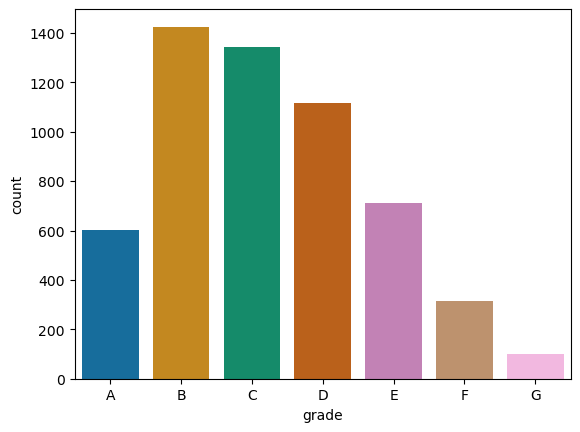

In [280]:
# Creating a countplot to visualize the distribution of loan grades for charged-off loans
sns.countplot(x='grade', data=loan_data[loan_data.loan_status == 'Charged Off'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
# This plot illustrates the distribution of loan grades for charged-off loans, providing insights into the default patterns across different grades.

In [281]:
# Checking unique values for the 'home_ownership' column
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

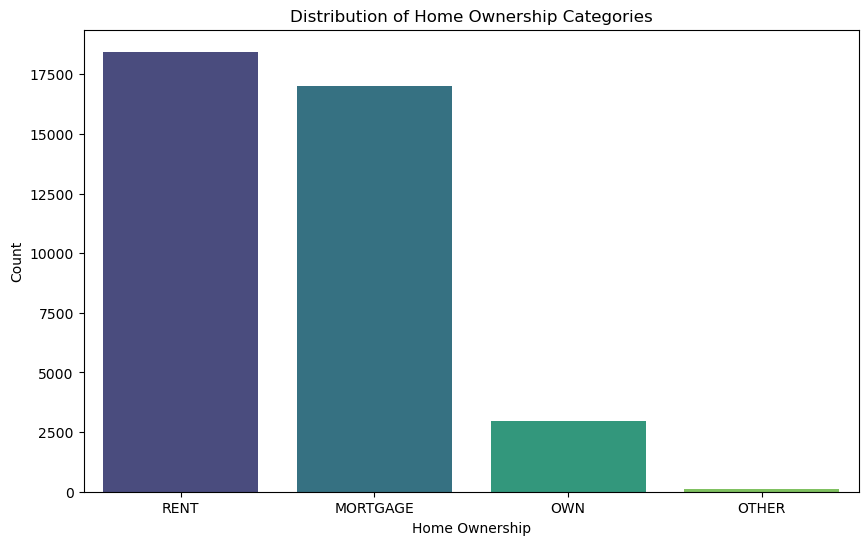

In [282]:
# Data Visualization: Distribution of 'home_ownership' categories
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=loan_data, order=loan_data['home_ownership'].value_counts().index, palette='viridis')
plt.title('Distribution of Home Ownership Categories')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

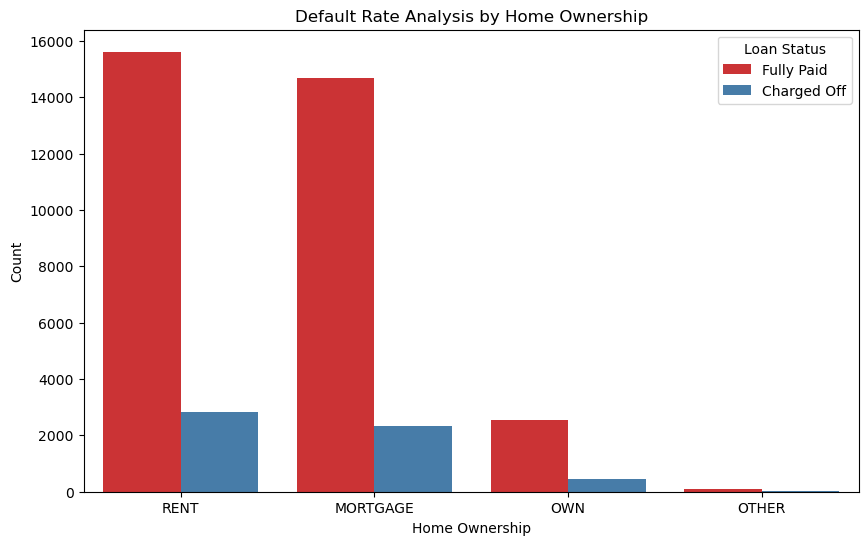

In [283]:
# Default Rate Analysis for 'home_ownership'
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data, order=loan_data['home_ownership'].value_counts().index, palette='Set1')
plt.title('Default Rate Analysis by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])
plt.show()

In [284]:
# Check for missing values in 'home_ownership' column
loan_data['home_ownership'].isnull().sum()

0

In [285]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [286]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

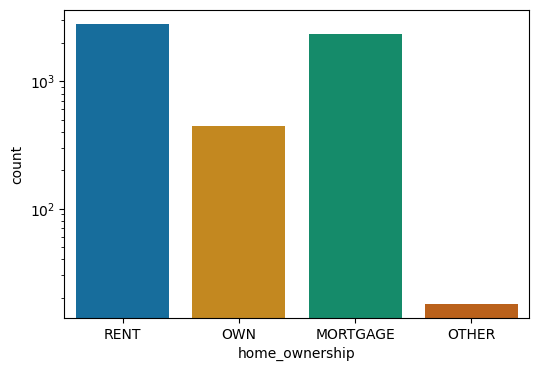

In [287]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

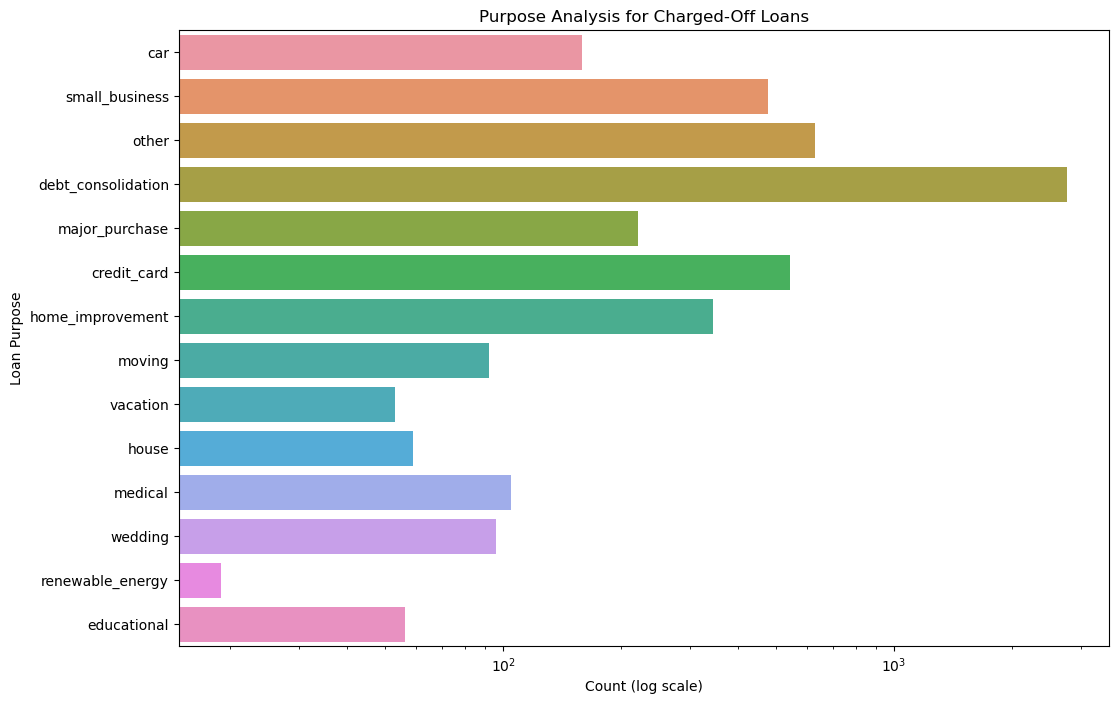

In [288]:
# Analyzing the purpose of the loan for charged-off cases
fig, ax = plt.subplots(figsize=(12, 8))
ax.set(xscale='log')
sns.countplot(y='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Count (log scale)')
plt.ylabel('Loan Purpose')
plt.title('Purpose Analysis for Charged-Off Loans')
plt.show()

###### Creating Bins for Numerical Variables to make them categorical for Simplification of Analysis,handling Non-Linearity, dealing with Outliers, interpretability,improved Visualization



In [289]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [290]:
# Viewing new bins created
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,145-274,0-5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,2-10,0-20,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,2-10,20-40,20-37,31k-58k,Dec,2011,274-403,5k-10k,5k-10k,18-24
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,2-10,20-40,2-20,31k-58k,Dec,2011,145-274,0-5k,0-5k,6-12


<Axes: xlabel='emp_length', ylabel='count'>

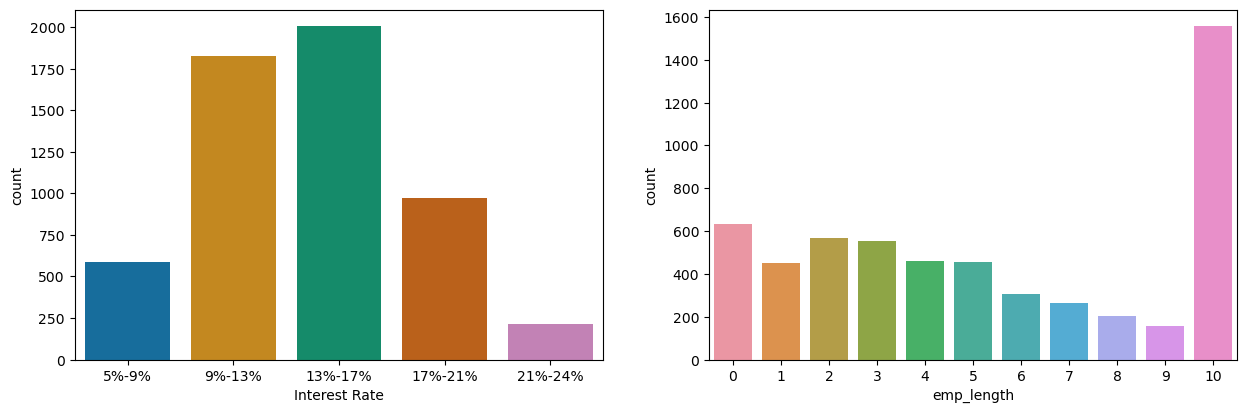

In [291]:
# Analyzing interest rate wrt the interest rate bins created
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

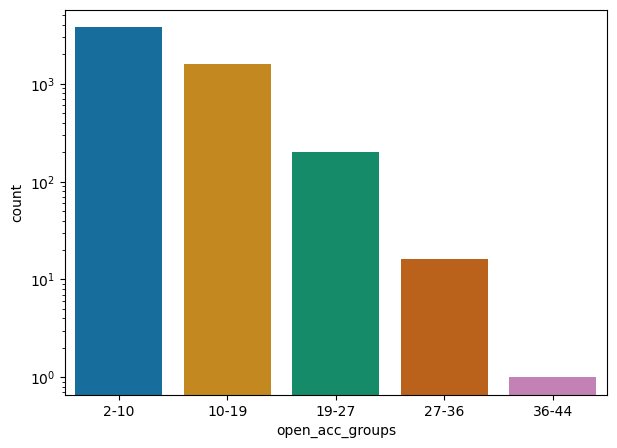

In [292]:
# Similarly analyzing open_acc,revol_util,total_acc,annual_inc
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

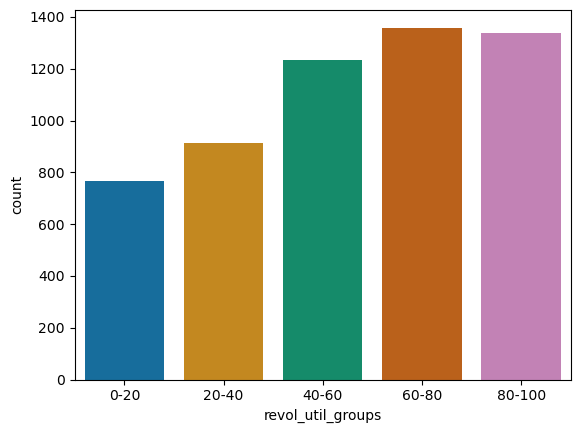

In [293]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

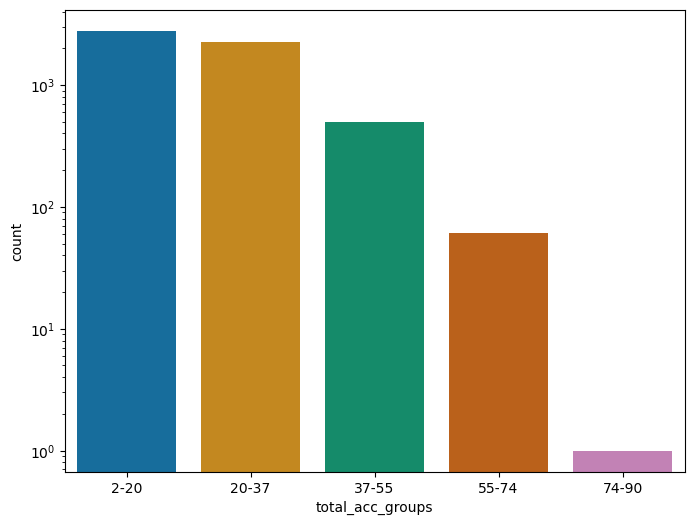

In [294]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

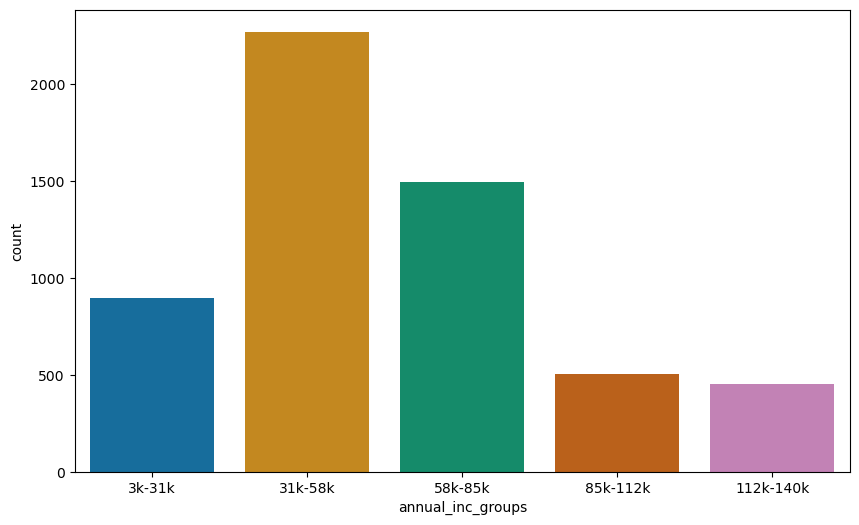

In [295]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

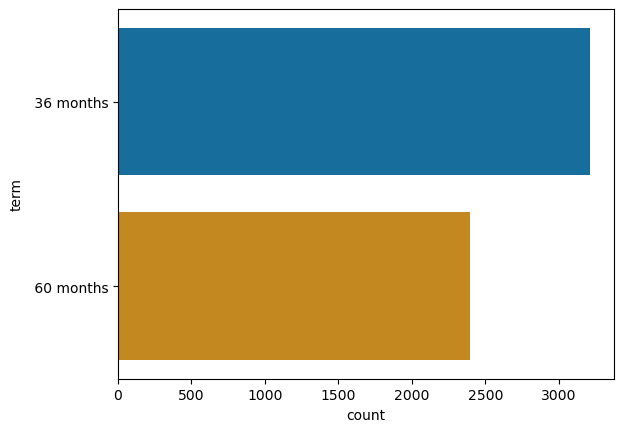

In [296]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

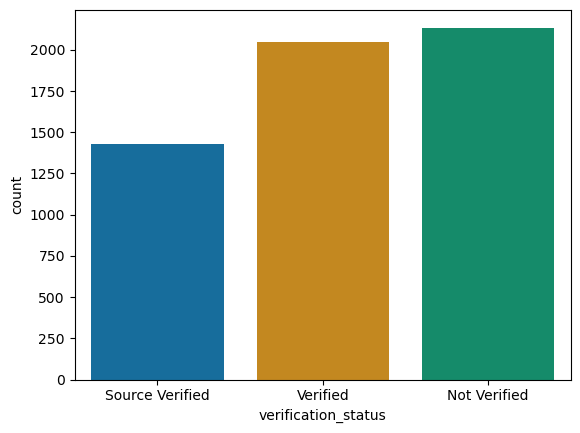

In [297]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

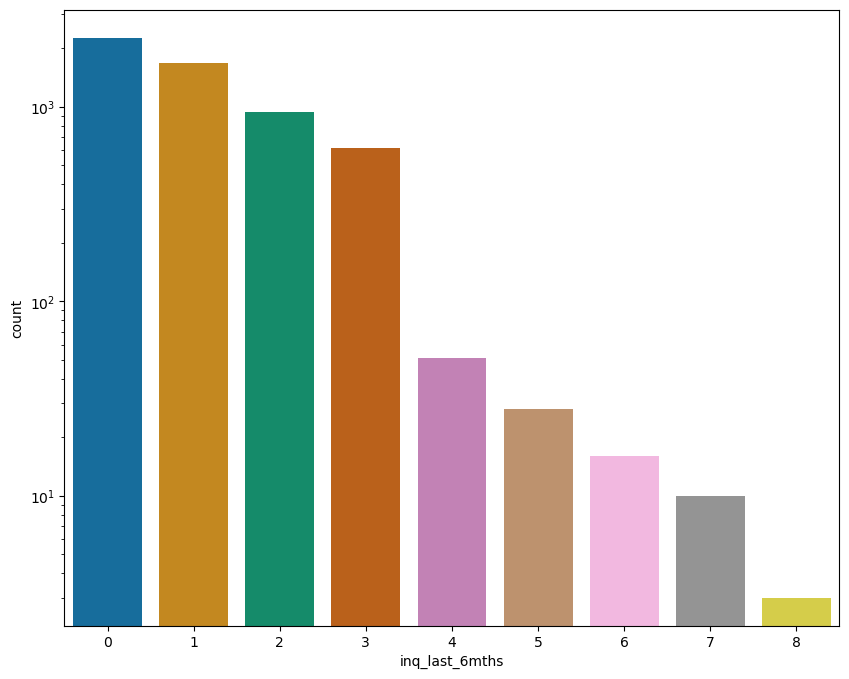

In [298]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

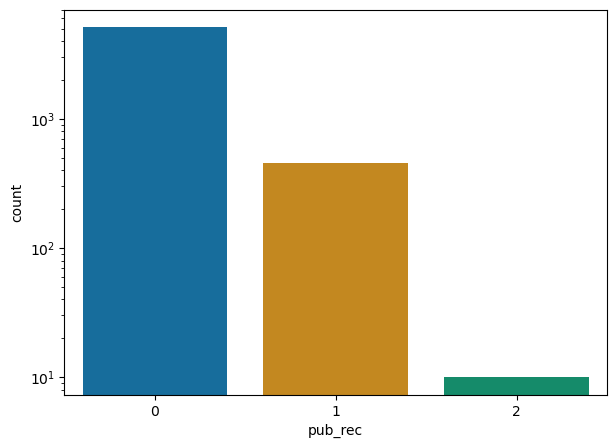

In [299]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analyzing by Issued Month and Year

In [300]:
#To better understand the patterns over time, we extract the month and year information from the 'issue_d' column. This allows us to analyze the data based on when the loans were issued.
# Extracting month and year from the 'issue_d' column
df_month_year = loan_data['issue_d'].str.partition("-", True)
loan_data['issue_month'] = df_month_year[0]
loan_data['issue_year'] = '20' + df_month_year[2]
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,145-274,0-5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,2-10,0-20,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,2-10,20-40,20-37,31k-58k,Dec,2011,274-403,5k-10k,5k-10k,18-24
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,2-10,20-40,2-20,31k-58k,Dec,2011,145-274,0-5k,0-5k,6-12


Text(0.5, 1.0, 'Distribution of Charged Off Loans by Issue Year')

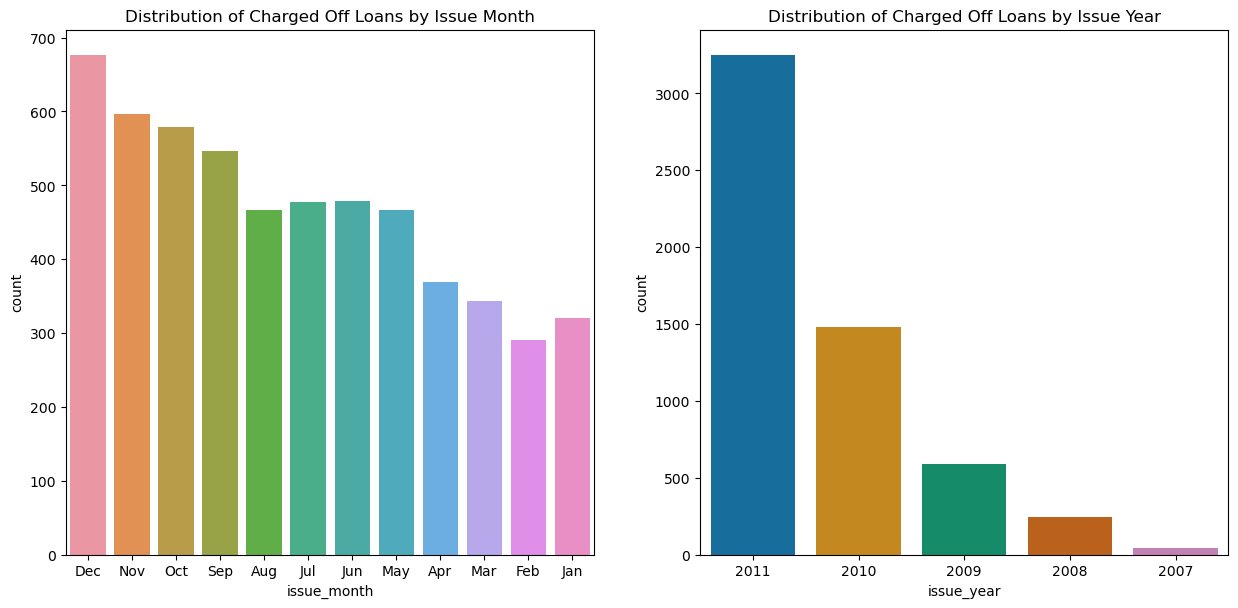

In [301]:
## Analyzing Loan Issuance Patterns for Charged Off Loans

#visualize the distribution of 'Charged Off' loans based on the month and year of issuance.
# Create a subplot with 2 plots: one for issue_month and one for issue_year
plt.figure(figsize=(15, 15))

# Plot for issue_month
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Distribution of Charged Off Loans by Issue Month')

# Plot for issue_year
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.title('Distribution of Charged Off Loans by Issue Year')


### Analysis of Loan Issuance Patterns for Charged Off Loans

#### Issue Month:
The analysis of 'Charged Off' loans based on the month of issuance reveals interesting patterns. The maximum number of defaults occurred when the loans were sanctioned in December. This observation could be attributed to various factors, such as year-end financial pressures or holiday-related expenses.

#### Issue Year:
When examining the distribution by issue year, it is noteworthy that loans issued in the year 2011 show a higher occurrence of defaults compared to other years. This finding might indicate specific economic conditions or lending practices during that period.

These insights provide valuable information for understanding the relationship between loan issuance patterns and the likelihood of default, contributing to our broader analysis of loan defaulting behavior.


In [302]:
#Analyzing installment,dti, loan_amnt

loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

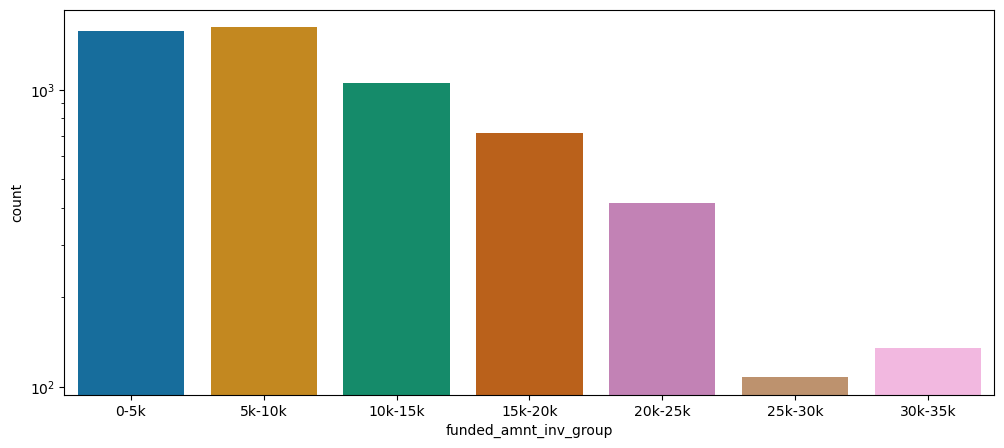

In [303]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

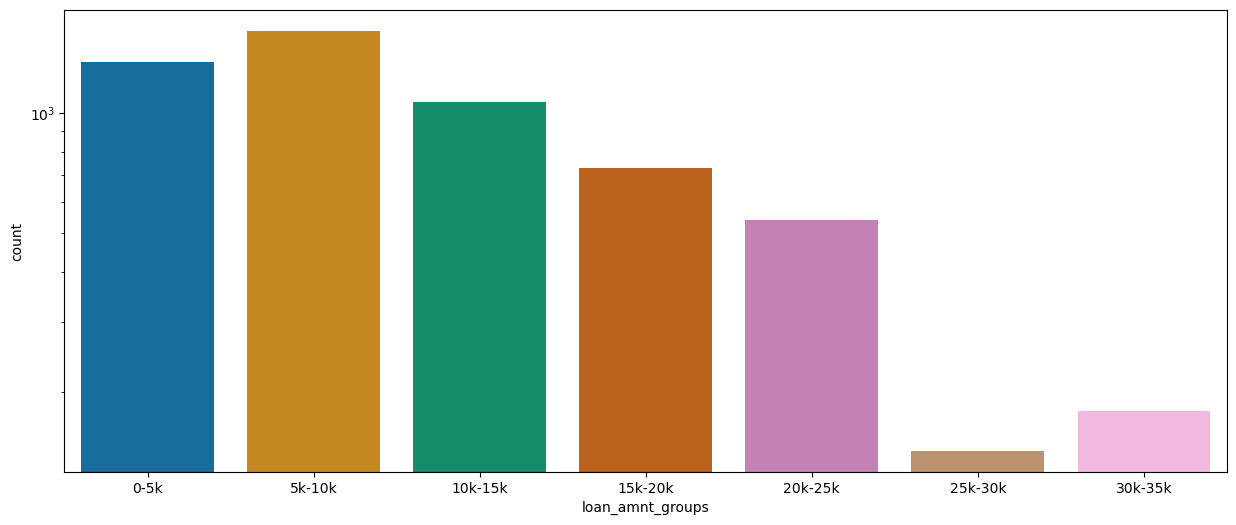

In [304]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

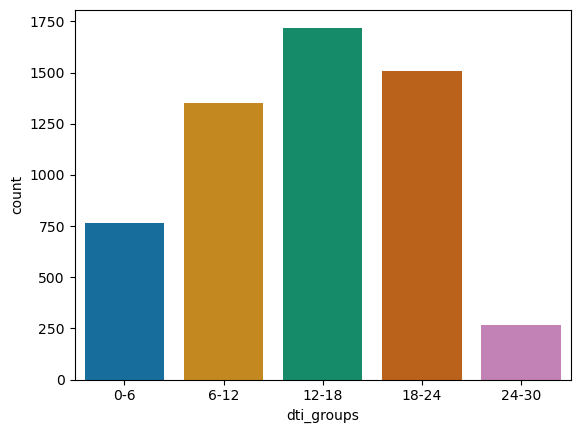

In [305]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

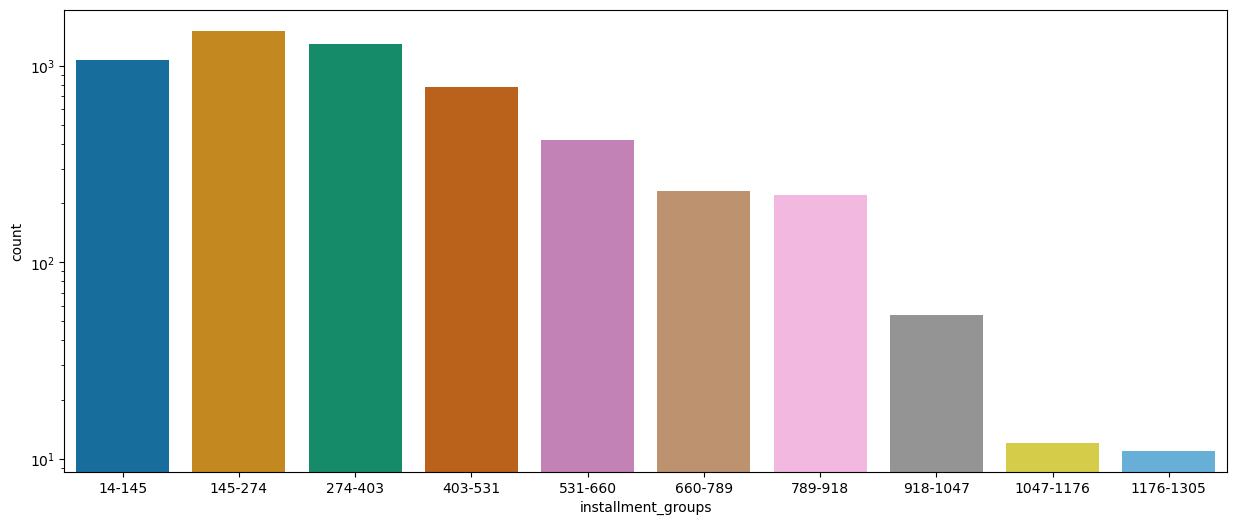

In [306]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

### These observations are derived from the analysis done so far and highlighted the potential factors that may be associated with a higher probability of defaulting in charged-off loans.

#### Here's a breakdown of the key findings:

House Ownership: Applicants with house ownership listed as 'RENT' are more likely to default.

Loan Purpose: Loans intended to clear other debts have a higher likelihood of default.

Interest Rate: Loans with interest rates in the range of 13-17% are associated with a higher probability of default.

Annual Income: Applicants with an annual income in the range of 31,201 - 58,402 are more likely to default.

Open Accounts: Applicants with 20-37 open accounts have a higher probability of defaulting.

Employment Length: Applicants with an employment length of 10 years are more likely to default.

Funded Amount by Investor: Loans with funded amounts between 5,000 - 10,000 have a higher likelihood of default.

Loan Amount: Loans in the amount range of 5,429 - 10,357 are associated with a higher probability of default.

DTI (Debt-to-Income Ratio): Loans with DTI in the range of 12-18 have a higher likelihood of default.

Monthly Installments: Loans with monthly installments between 145-274 are more likely to default.

Loan Term: Loans with a term of 36 months have a higher probability of default.

Verification Status: Loans with a status of 'Not Verified' are associated with a higher likelihood of default.

Inquiries in Last 6 Months: Loans with no inquiries in the last 6 months are more likely to default.

Derogatory Public Records: Loans with no derogatory public records have a higher likelihood of default.

Loan Purpose ('debt_consolidation'): Loans with the purpose of debt consolidation are more likely to default.

Grade and Subgrade: Loans with a grade of 'B' and a subgrade of 'B5' have a higher probability of default.

Date Issued: Loans issued in the later months of the year, particularly in 2011, show a higher occurrence of defaults, potentially related to economic conditions.

#### Analysing annual income with other columns 

#### 1.Annual income vs loan purpose

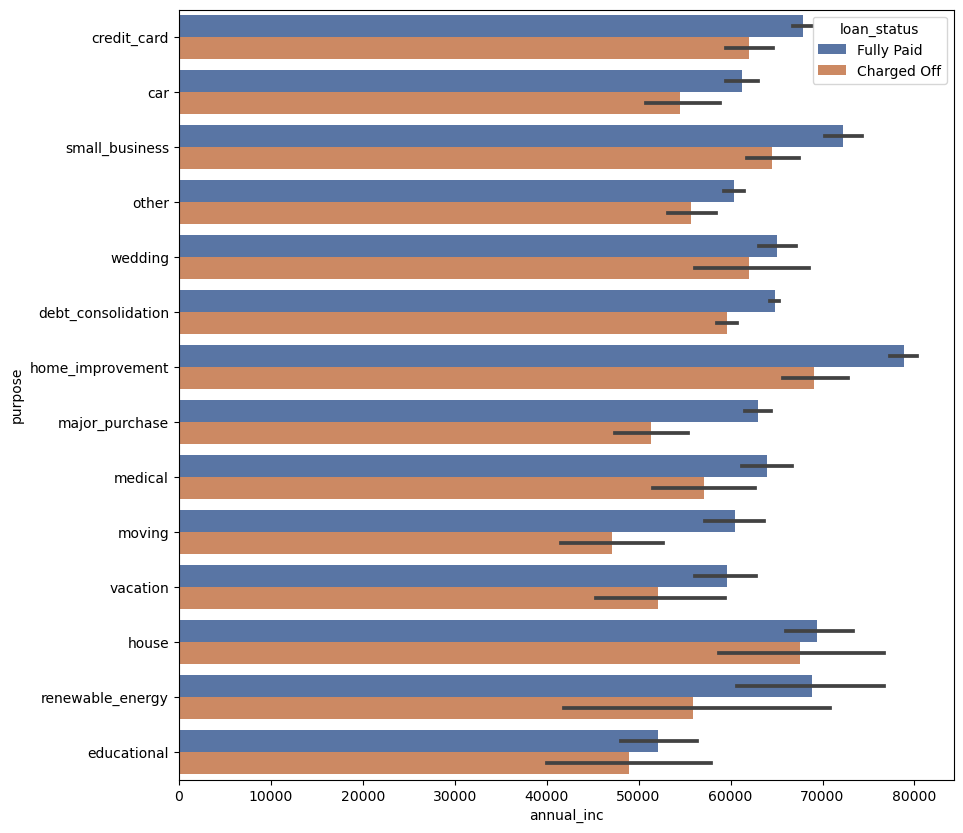

In [307]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

##### Insights from Annual Income vs. Loan Purpose Analysis
- The bar plot illustrates the relationship between annual income and loan purpose, distinguishing between Charged Off and Fully Paid loan statuses. Different income levels are associated with varying loan purposes, and the color differentiation provides a clear view of the defaulting patterns across different purposes.
- While "debt_consolidation" has the highest number of loan applications and defaults, it's interesting to note that applicants with higher annual incomes tend to apply for loans related to "home_improvement," "house," "renewable_energy," and "small_businesses."
- The purpose of the loan seems to vary based on the applicant's income level, indicating diverse financial goals and needs among borrowers.

#### 2.Annual income vs home ownership

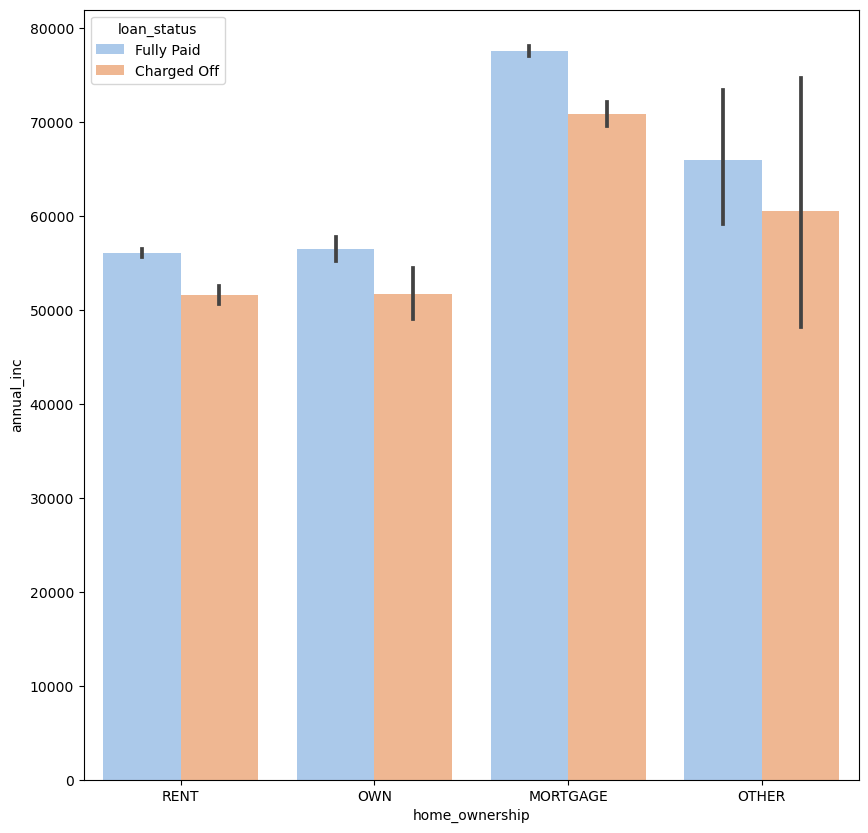

In [308]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Insights From Home Ownership and Annual Income

- Homeowners, particularly those with mortgages, tend to have higher annual incomes compared to renters and individuals with other forms of home ownership.
- The analysis shows a clear distinction in annual income across different categories of home ownership.
- Homeownership status appears to be correlated with income levels, influencing the ability to secure loans and potentially impacting loan default rates.



#### 3.Loan vs House Ownership

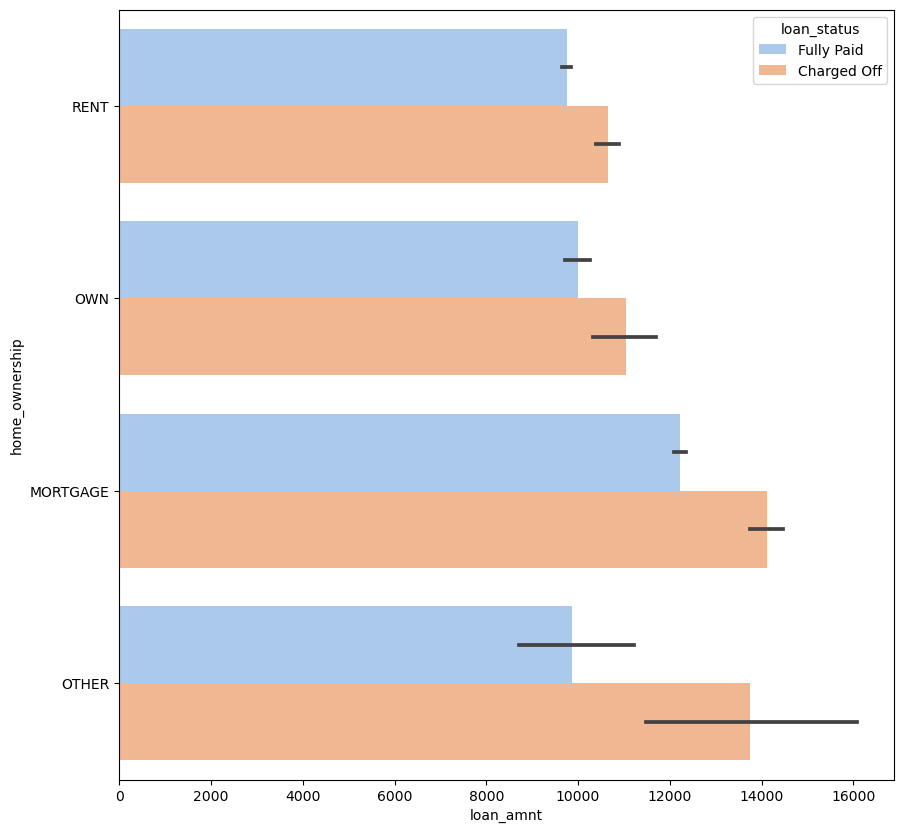

In [309]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### 4.Loan amount vs month issued and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

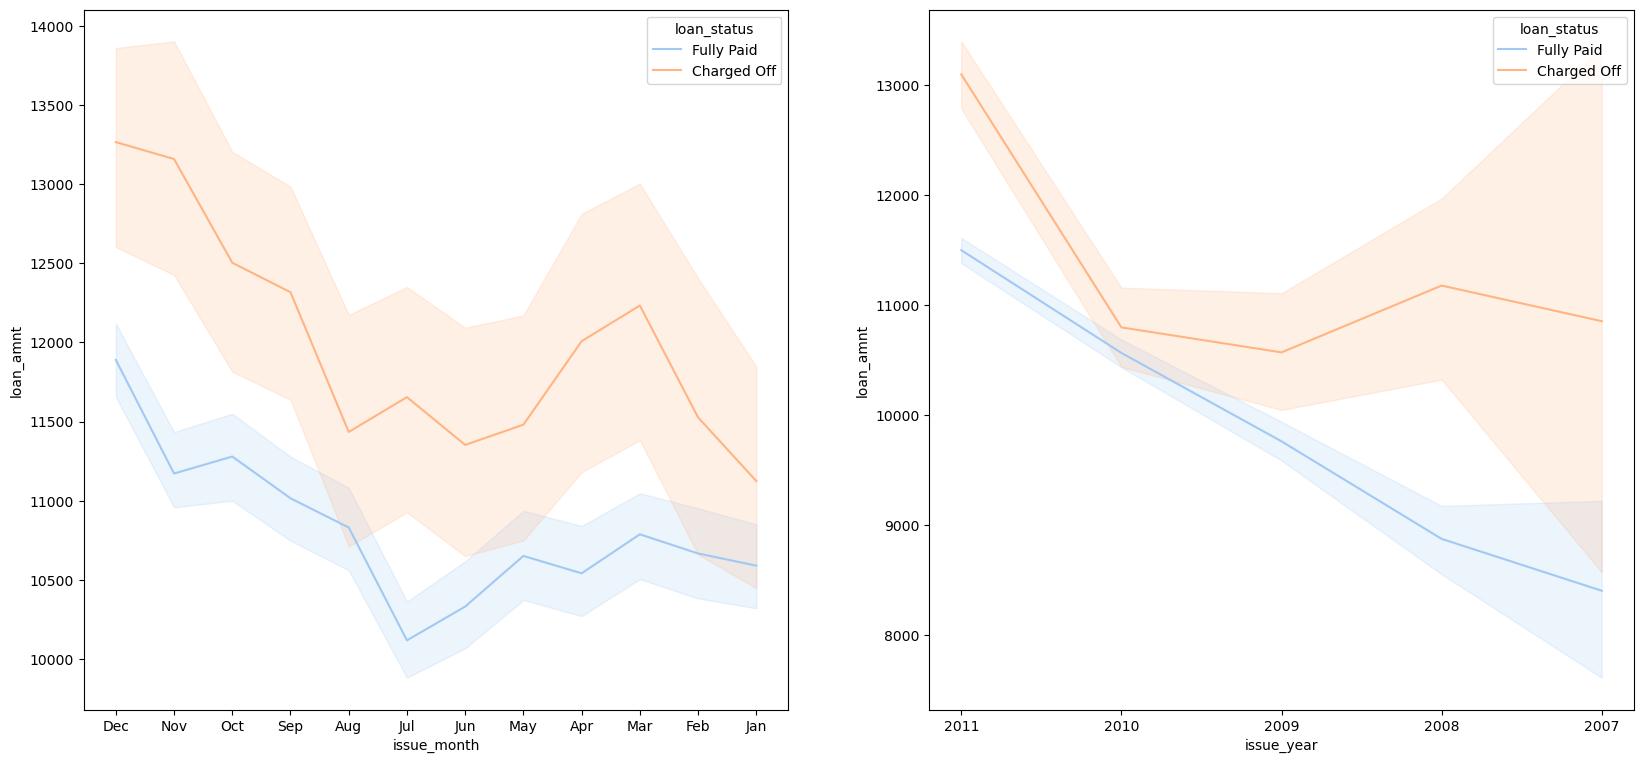

In [310]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

#### 5.Loan amount vs Grade

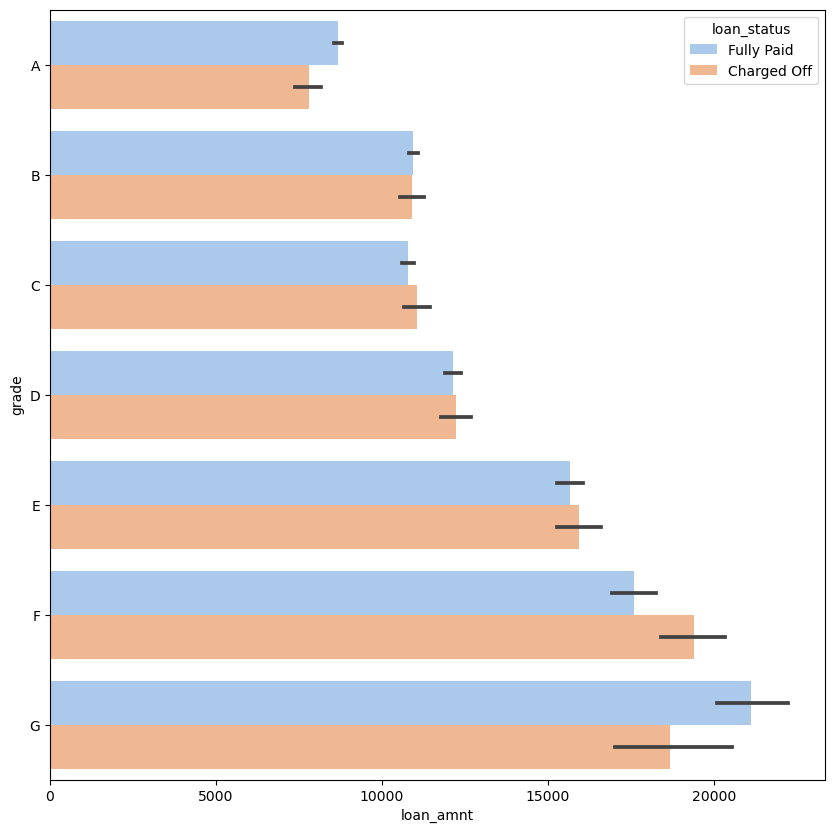

In [313]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

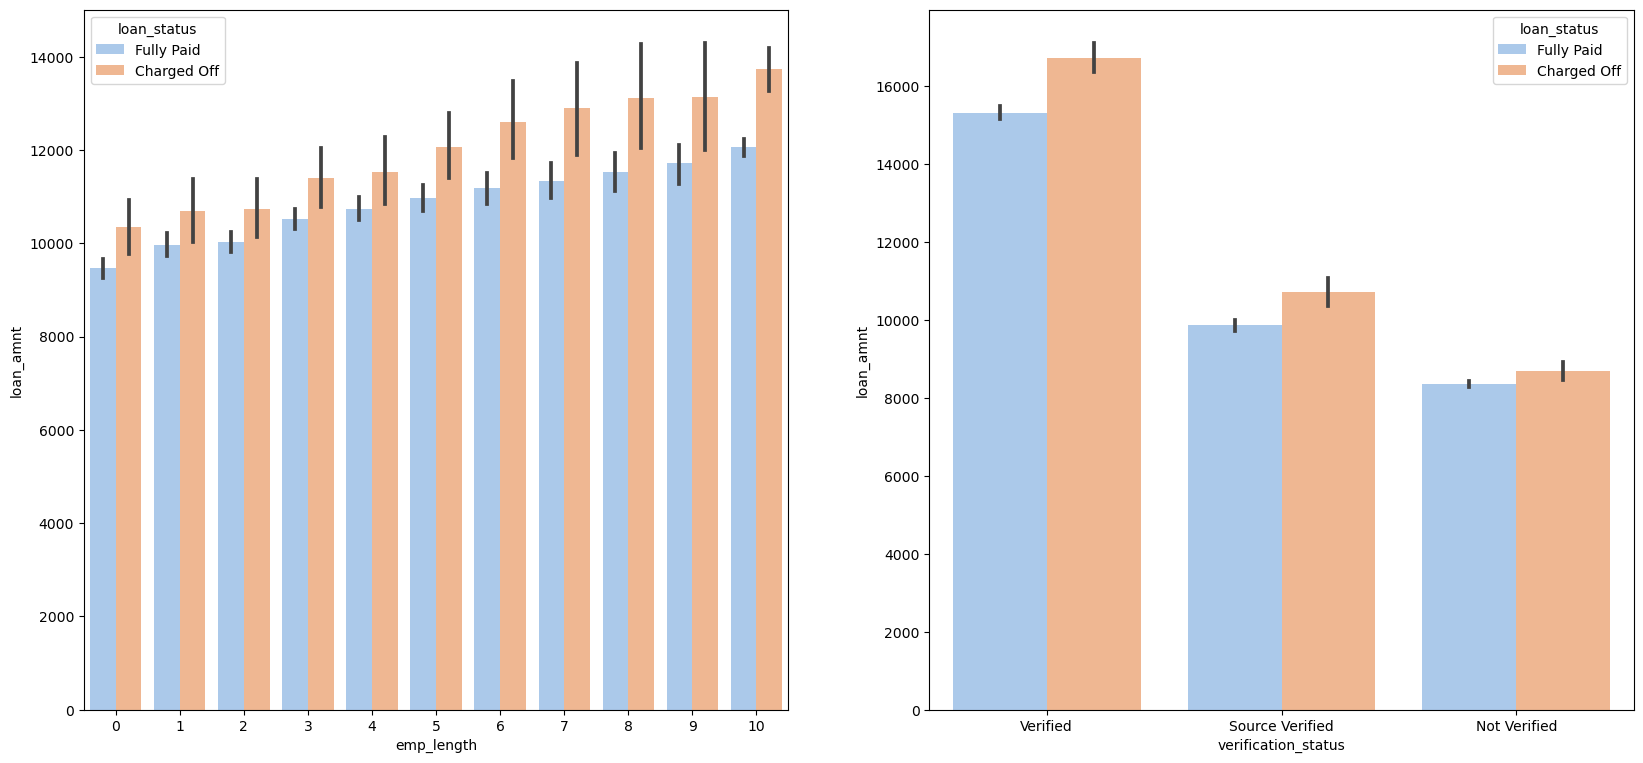

In [316]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


##### Employment History and Loan Amount Approval

- Employees with a longer working history are more likely to have their loan applications approved for a higher amount.
- Verification status appears to play a role in the approved loan amounts, with verified loan applications generally associated with higher values.
- These insights suggest that both employment history and verification status impact the loan approval process and the subsequent loan amounts granted to applicants.

#### grade vs interest rate

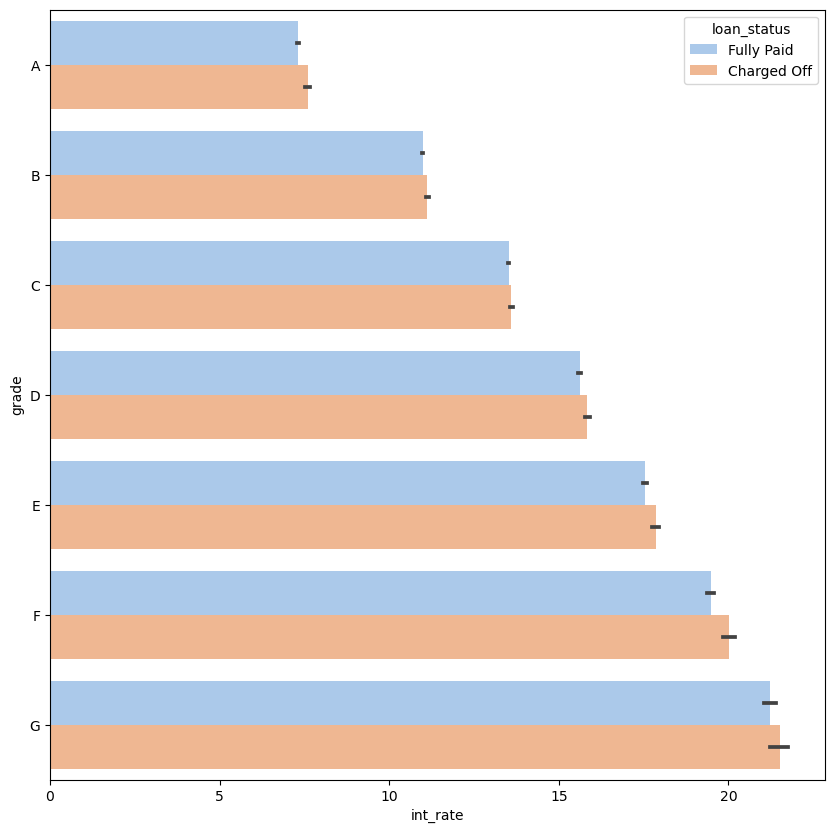

In [317]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

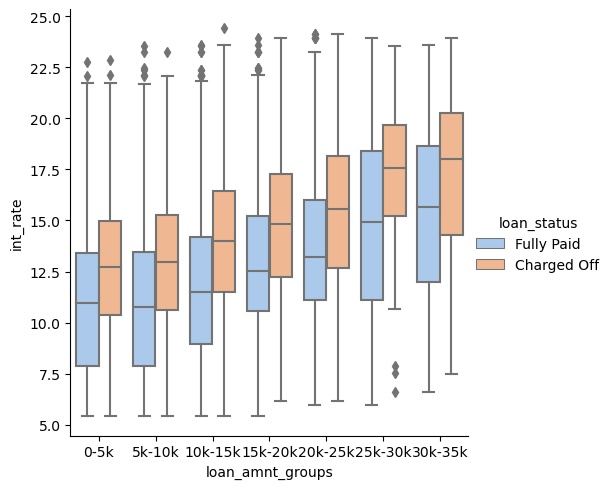

In [318]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

### Interest Rate and Loan Defaulting

- The analysis indicates that the interest rate for charged-off loans is consistently higher across all loan amount groups compared to fully paid loans.
- This observation suggests a strong correlation between higher interest rates and the likelihood of loan defaulting.
- The interest rate appears to be a significant driving factor influencing the default patterns in the dataset.

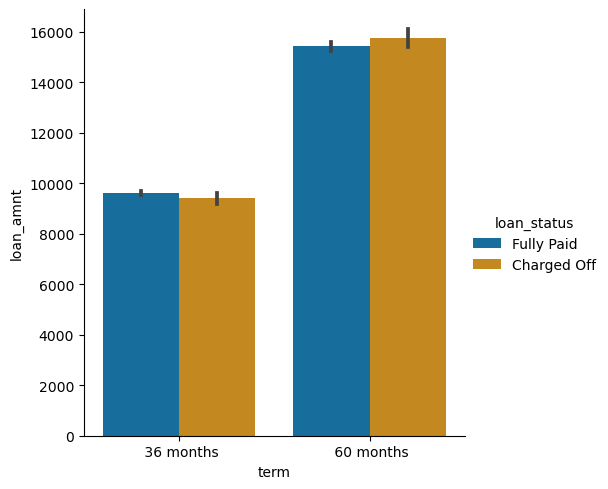

In [319]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

#### Loan Amount and Loan Term Analysis

- There is no significant difference in loan amounts between applicants who applied and defaulted.
- The observation suggests that applicants applying for long-term loans tend to request higher loan amounts.
- The relationship between loan amount and loan term is an essential factor to consider in understanding borrowing patterns and potential defaulting behavior.

### Insights from Charged Off Loan Analysis
The analysis of charged-off loans reveals the following insights:

Loan Purpose and Income:

Applicants taking loans for 'home improvement' with an income range of 60k - 70k are more likely to default.

Home Ownership and Income:

Applicants with 'MORTGAGE' home ownership and an income of 60k - 70k have a higher probability of default.

Interest Rate and Income:

Applicants charged an interest rate of 21-24% with an income of 70k-80k are more prone to default.

Loan Amount and Interest Rate:

Default probability is higher when the loan amount is in the range 30k - 35k, and the interest rate is between 15-17.5%.

Loan Purpose and Amount:

Small business loans with amounts greater than 14k have a higher likelihood of default.

Home Ownership and Loan Amount:

'MORTGAGE' home ownership with a loan amount in the range of 14k - 16k is associated with a higher default rate.

Grade and Loan Amount:

Loans with grade 'F' and amounts between 15k-20k have a higher chance of default.

Employment Length and Loan Amount:

Applicants with employment length of 10 years and loan amounts between 12k-14k are more likely to default.

Verification Status and Loan Amount:

Verified loans with amounts above 16k are associated with a higher probability of default.

Grade G and High Interest Rate:

Loans with grade 'G' and interest rates above 20% have an increased likelihood of default.

These insights provide a detailed understanding of the factors contributing to loan defaulting behavior.
